In [1]:
import algo_func

In [2]:
import statsmodels.api as sm

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import scipy.signal as sg

In [6]:
import matplotlib

In [7]:
import scipy as sp

In [8]:
import importlib

In [9]:
from tqdm import tqdm

In [10]:
data = pd.read_csv('elec_data.csv',index_col = 0)

In [12]:
data.index = pd.to_datetime(data.index)

In [13]:
data.head(10)

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
date,,,,,,,
2016-07-01 00:00:00,41.130001,12.481,36.535999,9.355,4.424,1.311,38.661999
2016-07-01 01:00:00,37.528000,10.136,33.936001,7.532,4.435,1.215,37.124001
2016-07-01 02:00:00,37.946999,11.309,35.330002,9.007,2.100,0.000,36.465000
2016-07-01 03:00:00,38.952000,11.895,35.543999,9.436,3.380,1.215,33.608501
2016-07-01 04:00:00,38.113998,11.476,35.410000,9.623,2.036,0.000,31.850500
2016-07-01 05:00:00,36.773998,10.974,34.928001,9.248,2.036,0.000,30.532000
2016-07-01 06:00:00,39.035999,11.811,37.153000,10.079,2.036,0.000,30.093000
2016-07-01 07:00:00,39.370998,11.309,36.535999,9.409,2.068,0.000,29.872999
2016-07-01 08:00:00,33.925999,8.461,31.899000,6.487,2.015,0.000,29.653000


In [14]:
data = data.asfreq('H')

In [15]:
data.describe()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
count,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000
mean,37.193346,8.537565,43.830356,8.322694,-3.423605,-2.085969,26.609376
std,10.218855,6.020442,13.056798,4.366059,6.144403,6.012796,11.888266
min,0.000000,-18.680000,11.205000,-6.594000,-14.350000,-31.462000,-2.646500
25%,30.156000,4.523000,37.394001,5.683000,-9.254000,-2.505000,16.469500
50%,37.193001,9.131000,41.388000,9.302000,-3.774000,-1.226000,26.577000
75%,44.062000,13.152000,46.078999,11.258000,2.527000,0.000000,35.585999
max,107.892998,36.438999,93.230003,28.736000,17.218000,2.932000,58.876999


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
ot = np.expand_dims(data['OT'].array,axis =1)

In [14]:
ot.shape

(17420, 1)

In [15]:
ot_ = scaler.fit_transform(ot)

(array([ 180., 1011., 2738., 2656., 2834., 3023., 2506., 1693.,  635.,
         144.]),
 array([-2.46097424, -1.94344488, -1.42591553, -0.90838618, -0.39085682,
         0.12667253,  0.64420189,  1.16173124,  1.67926059,  2.19678995,
         2.7143193 ]),
 <BarContainer object of 10 artists>)

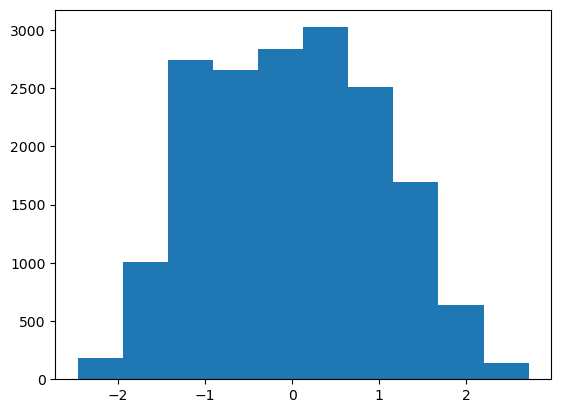

In [21]:
plt.hist(ot_)

In [21]:
data['ot_'] = ot_

In [22]:
data.head(10)

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT,ot_
date,,,,,,,,
2016-07-01 00:00:00,41.130001,12.481,36.535999,9.355,4.424,1.311,38.661999,1.013854
2016-07-01 01:00:00,37.528000,10.136,33.936001,7.532,4.435,1.215,37.124001,0.884479
2016-07-01 02:00:00,37.946999,11.309,35.330002,9.007,2.100,0.000,36.465000,0.829045
2016-07-01 03:00:00,38.952000,11.895,35.543999,9.436,3.380,1.215,33.608501,0.588759
2016-07-01 04:00:00,38.113998,11.476,35.410000,9.623,2.036,0.000,31.850500,0.440878
2016-07-01 05:00:00,36.773998,10.974,34.928001,9.248,2.036,0.000,30.532000,0.329967
2016-07-01 06:00:00,39.035999,11.811,37.153000,10.079,2.036,0.000,30.093000,0.293039
2016-07-01 07:00:00,39.370998,11.309,36.535999,9.409,2.068,0.000,29.872999,0.274533
2016-07-01 08:00:00,33.925999,8.461,31.899000,6.487,2.015,0.000,29.653000,0.256027


In [23]:
"""first we will try applying LMS with 8 delay. How to use cross validation yaha par.
Well through error , what are the parameters of LMS.
1. For the eta we will have the cross validation.
2. The measure for the cross validation MSE.
We meed weight tracks as well
"""

'first we will try applying LMS with 8 delay. How to use cross validation yaha par.\nWell through error , what are the parameters of LMS.\n1. For the eta we will have the cross validation.\n2. The measure for the cross validation MSE.\nWe meed weight tracks as well\n'

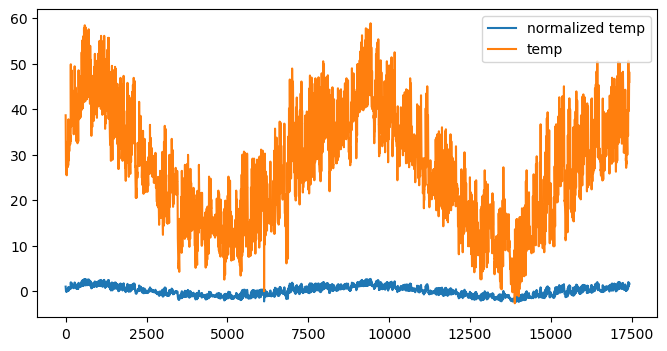

In [24]:
fig = plt.figure(figsize = (8,4))
plt.plot(ot_,label = 'normalized temp')
plt.plot(ot,label = 'temp')
plt.legend()

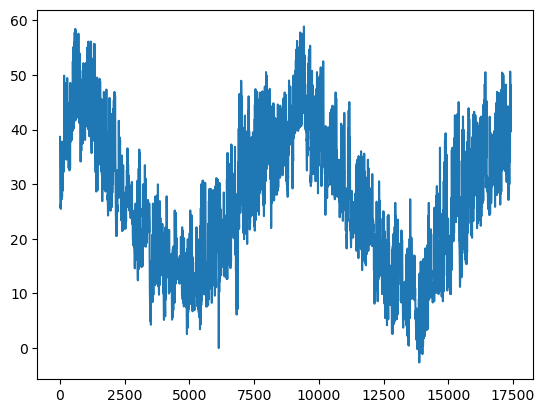

In [25]:
plt.plot(ot)

This data has trend nice. For the two year data, we can see that the data has correlation after a year. 

Text(0.5, 1.0, 'autocorrelation')

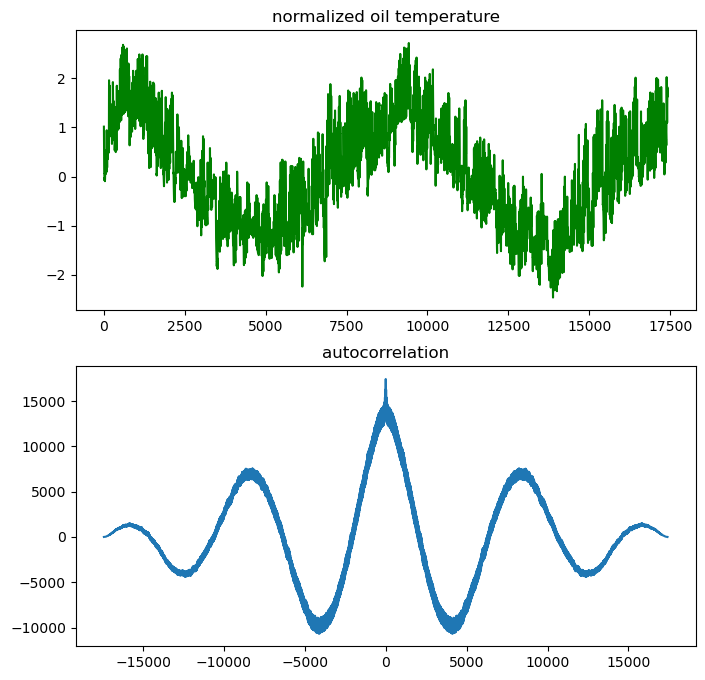

In [19]:
fig,ax = plt.subplots(nrows = 2, figsize = (8,8))
ot_auto = sg.correlate(ot_,ot_)
ot_auto_y = sg.correlation_lags(len(ot_),len(ot_))
ax[0].plot(ot_,'-g')
ax[0].set_title('normalized oil temperature')
ax[1].plot(ot_auto_y,ot_auto)
ax[1].set_title('autocorrelation')

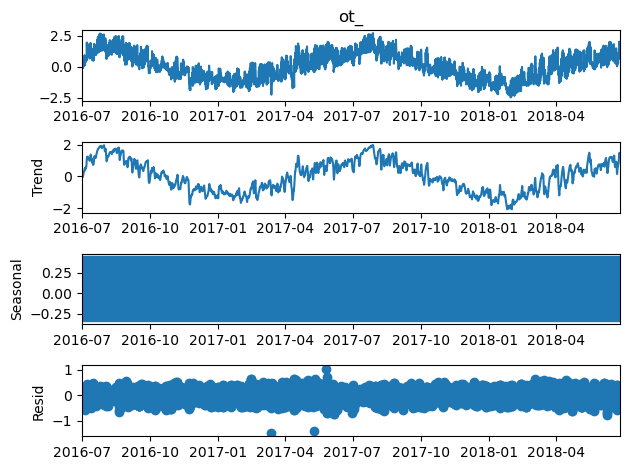

In [27]:
# using decomposition of data into trend, residual and seasonal 

decomposition = sm.tsa.seasonal_decompose(data['ot_'],model = 'additive')
fig = decomposition.plot()
matplotlib.rcParams['figure.figsize'] = [12,8]

17420
8711


Text(0.5, 1.0, 'oil temperature freq response')

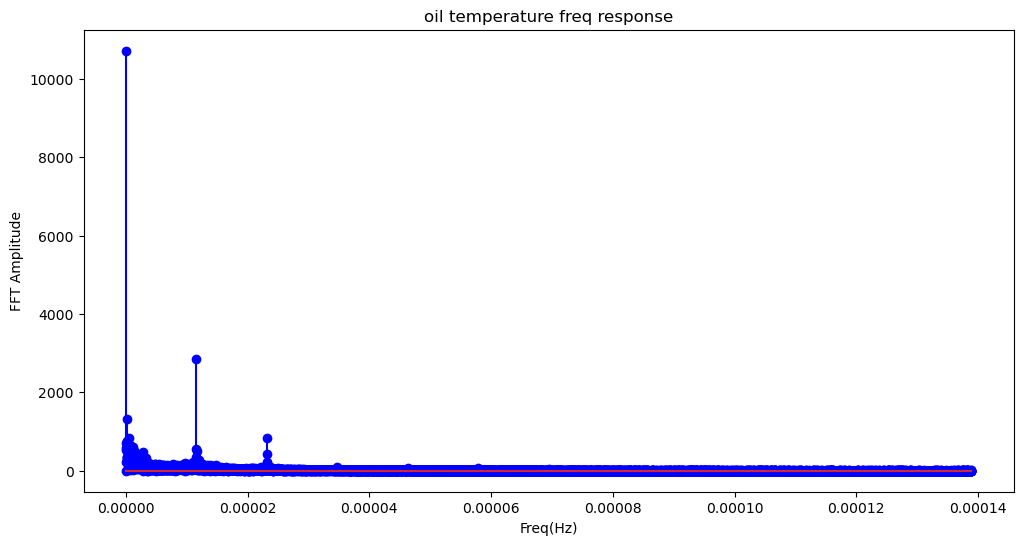

In [28]:
ot_fft = sp.fft.rfft(ot_[:,0])
n = np.shape(ot_)[0]
print(n)
freq = sp.fft.rfftfreq(n=n,d=60*60)
print(len(freq))
fig = plt.figure(figsize = (12,6))
plt.stem(freq,np.abs(ot_fft),'b')
plt.xlabel('Freq(Hz)')
plt.ylabel('FFT Amplitude')
plt.title('oil temperature freq response')

In [29]:
""" frequency response we can tell that it has some dc component or some white noise, 0 frequency
from other frequency we can determine the time period the values repeat themselves ,
this can help in forecasting"""

' frequency response we can tell that it has some dc component or some white noise, 0 frequency\nfrom other frequency we can determine the time period the values repeat themselves ,\nthis can help in forecasting'

In [22]:
train,valid,test = ot_[0:10_000],ot_[10_000:11_000],ot_[11_000:]

what will be the wise way of choosing the step size of this. 

In [31]:
sg_power = ot_auto[np.where(ot_auto_y == 0)]

In [32]:
filter_order = 8
eta_ = 1/(filter_order*sg_power)

### training LMS with MSE

In [33]:
train,valid,test = ot_[0:10_000],ot_[10_000:11_000],ot_[11_000:]

In [34]:
fil_order = 7
ip = train
op = train[fil_order+1:]
step_size = 0.001
y,e,w = algo_func.lms_mse(ip,op,fil_order,step_size)

100%|███████████████████████████████████| 9992/9992 [00:00<00:00, 159621.74it/s]


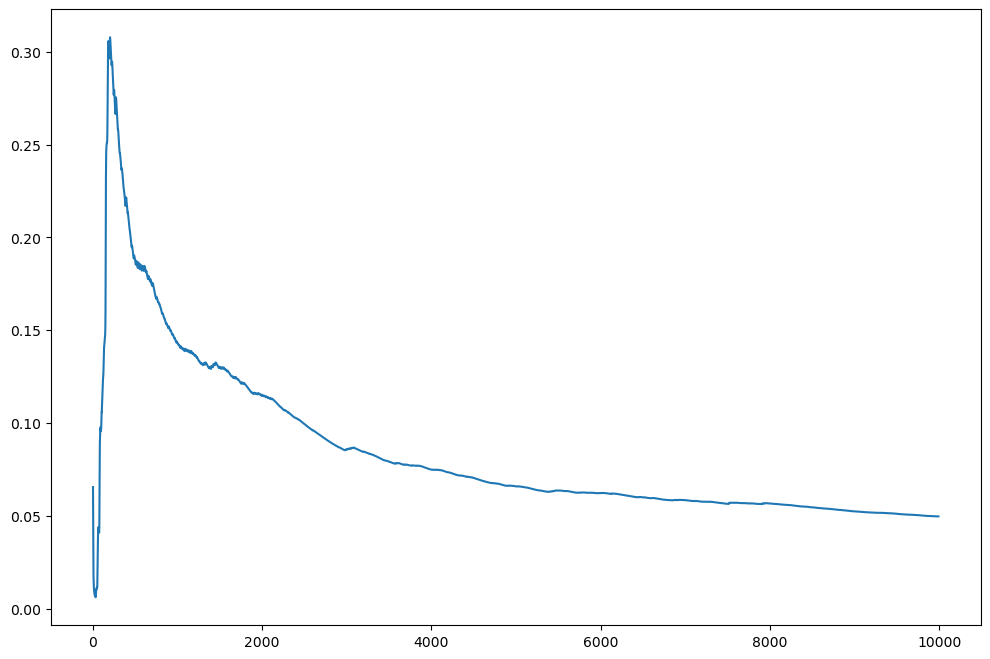

In [35]:
plt.plot(algo_func.learn_curve(e))

In [36]:
algo_func.mse(ip,op,w[-1])

0.24428163435441128

In [38]:
ip_val = valid
op_val = valid[fil_order+1:]
algo_func.mse(ip_val,op_val,w[-1])

0.1422894324064748

In [311]:
importlib.reload(algo_func)

<module 'algo_func' from '/Users/skapoor/Desktop/academics/academics_2/mlts/project_2/algo_func.py'>

In [312]:
step_size = [0.1,0.01,0.001,0.0001]
mse_train_step = []
mse_val_step = []
fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]


for step in step_size:
    
    y,e,w = algo_func.lms_mse(ip_train,op_train,fil_order,step)
    mse_train_step.append(algo_func.mse(ip_train,op_train,w[-1]))
    mse_val_step.append(algo_func.mse(ip_val,op_val,w[-1]))

print(mse_train_step)
print(mse_val_step)

100%|█████████████████████████████████| 9992/9992 [00:00<00:00, 270792.59it/s]

[2.4309895357536e+192, 0.003339112777409921, 0.0038648442611408304, 0.04704356588727597]
[1.4290944933737044e+192, 0.0025255903952838402, 0.0028680045557581673, 0.03659418760906389]


In [313]:
step_size = np.arange(1,6)*0.01

mse_train_step = []
mse_val_step = []
fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]


for step in step_size:
    
    y,e,w = algo_func.lms_mse(ip_train,op_train,fil_order,step)
    mse_train_step.append(algo_func.mse(ip_train,op_train,w[-1]))
    mse_val_step.append(algo_func.mse(ip_val,op_val,w[-1]))

print(mse_train_step)
print(mse_val_step)

100%|█████████████████████████████████| 9992/9992 [00:00<00:00, 250525.96it/s]

[0.003339112777409921, 0.006914134417746827, 0.01211957474956487, 0.017404800558528954, 0.022439729768164364]
[0.0025255903952838402, 0.004505506299110721, 0.007533291661862433, 0.010671916165569425, 0.013707180432115886]


In [43]:
step_size

array([0.01, 0.02, 0.03, 0.04, 0.05])

In [314]:
###
step_size_best = 0.02

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

y,e,w = algo_func.lms_mse(ip_train,op_train,fil_order,step_size_best)
print(algo_func.mse(ip_train,op_train,w[-1]))
print(algo_func.mse(ip_val,op_val,w[-1]))

100%|█████████████████████████████████| 9992/9992 [00:00<00:00, 190562.63it/s]

0.006914134417746827
0.004505506299110721


In [315]:
step_size_2 = np.linspace(0.013,0.015,21)

mse_train_step = []
mse_val_step = []
fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]


for step in step_size_2:
    
    y,e,w = algo_func.lms_mse(ip_train,op_train,fil_order,step)
    mse_train_step.append(algo_func.mse(ip_train,op_train,w[-1]))
    mse_val_step.append(algo_func.mse(ip_val,op_val,w[-1]))

print(mse_train_step)
print(mse_val_step)

100%|█████████████████████████████████| 9992/9992 [00:00<00:00, 247639.31it/s]

[0.004120796004779491, 0.0041509472375910106, 0.004181406641238795, 0.004212175646271781, 0.004243255430782648, 0.004274646930259214, 0.004306350847221168, 0.004338367660639459, 0.004370697635135899, 0.004403340829961334, 0.0044362971077512295, 0.004469566143058856, 0.004503147430665454, 0.004537040293668211, 0.004571243891347545, 0.0046057572268142465, 0.00464057915443897, 0.004675708387065601, 0.004711143503011364, 0.004746882952855774, 0.004782925066021591]
[0.002949739609767293, 0.002965964909955584, 0.002982367370501826, 0.0029989488791409245, 0.0030157111263661046, 0.003032655612970504, 0.0030497836574150923, 0.003067096403021689, 0.0030845948249900723, 0.0031022797372386043, 0.003120151799068397, 0.0031382115216516573, 0.0031564592743445617, 0.003174895290825871, 0.003193519675062994, 0.0032123324071065052, 0.0032313333487155784, 0.0032505222488159397, 0.0032698987487930218, 0.0032894623876223573, 0.003309212606840015]


In [316]:
m_val = min(mse_train_step)
print(m_val)
mse_train_step.index(m_val)
print(step_size_2[i_min])

0.004120796004779491
0.013


In [317]:
i_min = mse_train_step.index(m_val)

In [318]:
print(step_size_2[i_min])

0.013


In [323]:
step_size_best = 0.013

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

y,e,w = algo_func.lms_mse(ip_train,op_train,fil_order,step_size_best)
print(algo_func.mse(ip_train,op_train,w[-1]))
print(algo_func.mse(ip_val,op_val,w[-1]))

100%|█████████████████████████████████| 9992/9992 [00:00<00:00, 140567.93it/s]

0.004120796004779491
0.002949739609767293


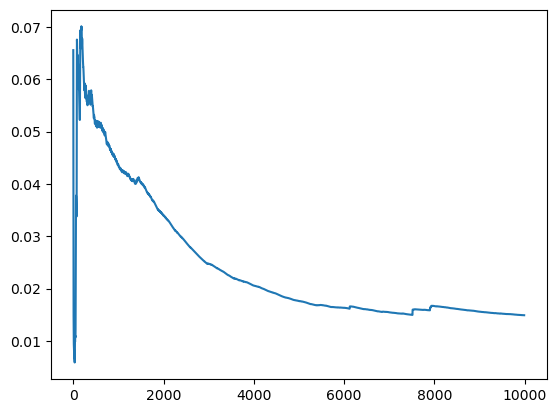

In [324]:
plt.plot(algo_func.learn_curve(e))

In [325]:
def pred(ip,w):
    
    ip = ip[:,0]
    len_w = len(w)
    y = sg.lfilter(w,1,ip)
    y = y[len_w:]
    
    return y

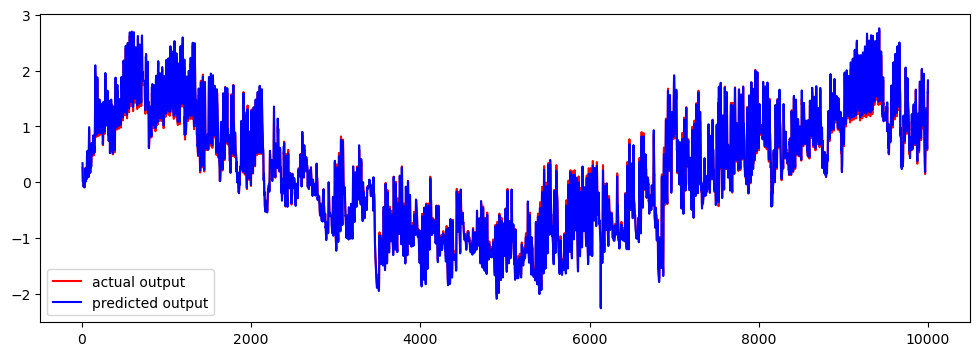

In [326]:
# for train

ser = np.arange(fil_order+1,len(ip_train))
fig = plt.figure(figsize = (12,4))
plt.plot(ser,op_train,'-r',label = 'actual output')
plt.plot(ser,pred(ip_train,w[-1]),'-b',label = 'predicted output')
plt.legend()

0.002949739609767293


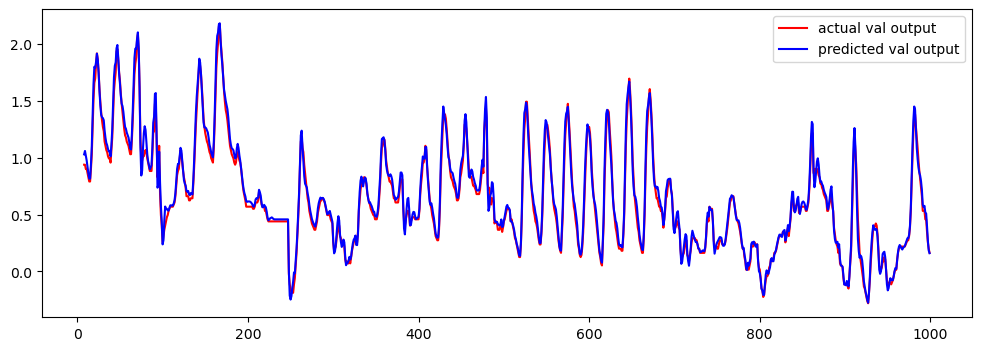

In [327]:
ser = np.arange(fil_order+1,len(ip_val))
fig = plt.figure(figsize = (12,4))
plt.plot(ser,op_val,'-r',label = 'actual val output')
plt.plot(ser,pred(ip_val,w[-1]),'-b',label = 'predicted val output')
plt.legend()
print(algo_func.mse(ip_val,op_val,w[-1]))

In [328]:
ip_test = test
op_test = test[fil_order+1:]

0.0038702980510055135


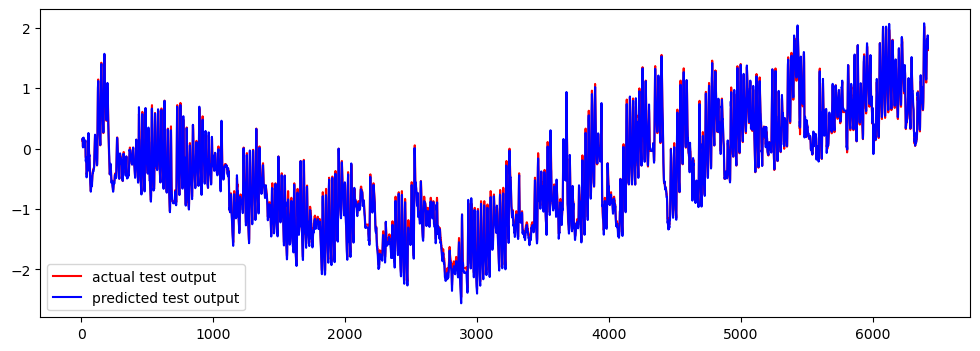

In [329]:
ser = np.arange(fil_order+1,len(ip_test))
fig = plt.figure(figsize = (12,4))
plt.plot(ser,op_test,'-r',label = 'actual test output')
plt.plot(ser,pred(ip_test,w[-1]),'-b',label = 'predicted test output')
plt.legend()
print(algo_func.mse(ip_test,op_test,w[-1]))

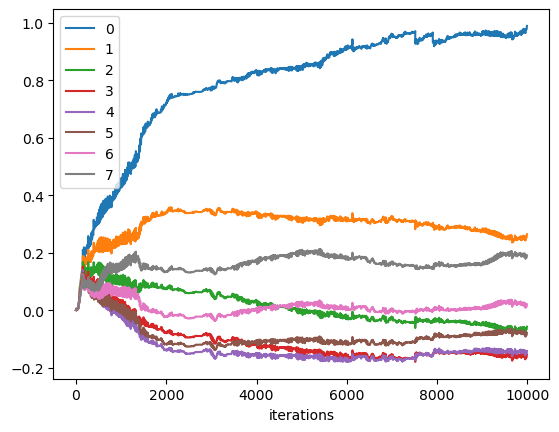

In [330]:
# weight tracks

algo_func.wt_tracks(w)

### Training LMS with MCC

In [77]:
import importlib

In [179]:
from tqdm import tqdm

In [272]:
importlib.reload(algo_func)

<module 'algo_func' from '/Users/skapoor/Desktop/academics/academics_2/mlts/project_2/algo_func.py'>

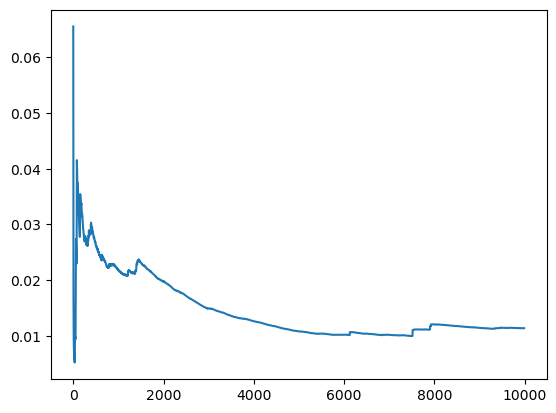

In [331]:
# taking step_size from the LMS with MCC
step_size = 0.02

kern_size = 1

y,e,w = algo_func.lms_mcc(ip_train,op_train,fil_order,step_size)

plt.plot(algo_func.learn_curve(e))

In [332]:
print(algo_func.mse(ip_train,op_train,w[-1]))

0.018540997092927926


In [333]:
# finding best kernsize

kern_size = 1
step_size = np.linspace(0.0521,0.0522,11)

mse_train_step = []
mse_val_step = []
fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]


for step in step_size:
    
    y,e,w = algo_func.lms_mcc(ip_train,op_train,fil_order,step,kern_size)
    mse_train_step.append(algo_func.mse(ip_train,op_train,w[-1]))
    mse_val_step.append(algo_func.mse(ip_val,op_val,w[-1]))

print(mse_train_step)
print(mse_val_step)

[0.016346252629613194, 0.014763590740345372, 0.014797700775986269, 0.01674112922180016, 0.018623844650430297, 0.016798110711123724, 0.01860291296265419, 0.01811353303683442, 0.01936835607984252, 0.019459057869012825, 0.018426165222351843]
[0.01134183219850125, 0.010282430074908568, 0.010261433569854005, 0.01161905862188809, 0.012758219112903087, 0.011550422162171819, 0.01270884161167307, 0.01247597601584273, 0.013232516148881704, 0.01322667029568529, 0.012530163244480455]


#### best alpha for kern size 1

In [334]:

m_val = min(mse_train_step)
print(m_val)
i_min = mse_train_step.index(m_val)
print(step_size[i_min])

0.014763590740345372
0.052110000000000004


In [335]:
step_size

array([0.0521 , 0.05211, 0.05212, 0.05213, 0.05214, 0.05215, 0.05216,
       0.05217, 0.05218, 0.05219, 0.0522 ])

In [336]:
# finding best kernsize

kern_size = 10
step_size = np.linspace(0.261,0.262,11)

mse_train_step = []
mse_val_step = []
fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]


for step in step_size:
    
    y,e,w = algo_func.lms_mcc(ip_train,op_train,fil_order,step,kern_size)
    mse_train_step.append(algo_func.mse(ip_train,op_train,w[-1]))
    mse_val_step.append(algo_func.mse(ip_val,op_val,w[-1]))

print(mse_train_step)
print(mse_val_step)

m_val = min(mse_val_step)
print(m_val)
i_min = mse_val_step.index(m_val)
print(step_size[i_min])

[0.02989958572638179, 0.029907693598593497, 0.02991575404405152, 0.029923766626426148, 0.029931730912044995, 0.029939646470480384, 0.029947512875125665, 0.02995532970375871, 0.029963096539093893, 0.029970812969317223, 0.02997847858861011]
[0.018303451202986036, 0.01830879425148423, 0.01831411136951741, 0.01831940227121765, 0.0183246666716859, 0.018329904287359738, 0.018335114836374723, 0.018340298038918006, 0.018345453617575277, 0.018350581297667517, 0.018355680807581022]
0.018303451202986036
0.261


#### best alpha for kernel size 10 is 0.262, with 0.0004 as val loss

In [337]:
# finding best kern size, kern_size = 0.1

kern_size = 0.1
step_size = np.linspace(0.0099,0.00991,11)
mse_train_step = []
mse_val_step = []
fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]


for step in step_size:
    
    y,e,w = algo_func.lms_mcc(ip_train,op_train,fil_order,step,kern_size)
    mse_train_step.append(algo_func.mse(ip_train,op_train,w[-1]))
    mse_val_step.append(algo_func.mse(ip_val,op_val,w[-1]))

print(mse_train_step)
print(mse_val_step)

m_val = min(mse_train_step)
print(m_val)
i_min = mse_train_step.index(m_val)
print(step_size[i_min])

[0.020150421474350328, 0.012855797757576538, 0.03242543776069799, 0.02524309903492544, 0.010134518920102663, 0.02501597516859215, 0.019816755605332925, 0.013321609623112445, 0.03222221710328373, 0.03655252718194624, 0.012279720415308852]
[0.013108228862041974, 0.008463812980868048, 0.019620446668674078, 0.015871698166281083, 0.006870690231911815, 0.015629269833467727, 0.01305816577261952, 0.008758432583667113, 0.020436409155474806, 0.02194051660295819, 0.008180750464717392]
0.010134518920102663
0.009904000000000001


#### best alpha for kern_size 0.1 is 0.0099

In [155]:
#finding best kern_size, kern_size = 0.01
# finding its best alpha

kern_size = 0.1
step_size = np.linspace(0.009,0.0099,10)
mse_train_step = []
mse_val_step = []
fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]


for step in step_size:
    
    y,e,w = algo_func.lms_mcc(ip_train,op_train,fil_order,step,kern_size)
    mse_train_step.append(algo_func.mse(ip_train,op_train,w[-1]))
    mse_val_step.append(algo_func.mse(ip_val,op_val,w[-1]))

print(mse_train_step)
print(mse_val_step)

m_val = min(mse_train_step)
print(m_val)
i_min = mse_train_step.index(m_val)
print(step_size[i_min])

100%|███████████████████████████████████| 9992/9992 [00:00<00:00, 111841.24it/s]

[0.0008977130177677315, 0.0013185934516528244, 4.588991043345928e-06, 0.0008866914107800838, 0.0010137040366068333, 0.0011679652781821073, 0.0006875006593485451, 0.0004442821282455478, 0.0003049285959469129, 2.6561686378881754e-08]
[0.0005229008562172636, 0.0007680557496940897, 2.673000500433634e-06, 0.000516480978576342, 0.0005904634311872651, 0.0006803176871736916, 0.0004004561327596799, 0.0002587859378928298, 0.00017761514064066223, 1.5471680008192498e-08]
2.6561686378881754e-08
0.0099


In [173]:
#finding best kern_size, kern_size = 0.01
# finding its best alpha

kern_size = 0.0999
step_size = np.linspace(0.0090,0.0091,10)
mse_train_step = []
mse_val_step = []
fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]


for step in step_size:
    
    y,e,w = algo_func.lms_mcc(ip_train,op_train,fil_order,step,kern_size)
    mse_train_step.append(algo_func.mse(ip_train,op_train,w[-1]))
    mse_val_step.append(algo_func.mse(ip_val,op_val,w[-1]))

print(mse_train_step)
print(mse_val_step)

m_val = min(mse_val_step)
print(m_val)
i_min = mse_val_step.index(m_val)
print(step_size[i_min])

100%|███████████████████████████████████| 9992/9992 [00:00<00:00, 119149.39it/s]

[0.00047882520690300644, 0.00015275874118560976, 6.481275847683693e-08, 3.381063852904643e-05, 5.2142182683258776e-05, 1.4010872882523321e-05, 0.0001035229612859161, 0.0001383734625745214, 4.34827626980856e-05, 2.166269599693561e-06]
[0.00027890662796734847, 8.897907792320083e-05, 3.775220614001377e-08, 1.9694057550878757e-05, 3.037183535325246e-05, 8.161068494740504e-06, 6.030016722845159e-05, 8.059992517195011e-05, 2.532788697000263e-05, 1.2618110755415983e-06]
3.775220614001377e-08
0.009022222222222221


In [338]:
kern_size = 0.1
step_size = np.linspace(0.0090,0.0099,10)
mse_train_step = []
mse_val_step = []
fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]


for step in step_size:
    
    y,e,w = algo_func.lms_mcc(ip_train,op_train,fil_order,step,kern_size)
    mse_train_step.append(algo_func.mse(ip_train,op_train,w[-1]))
    mse_val_step.append(algo_func.mse(ip_val,op_val,w[-1]))

print(mse_train_step)
print(mse_val_step)

m_val = min(mse_val_step)
print(m_val)
i_min = mse_val_step.index(m_val)
print(step_size[i_min])

[0.07075273433729401, 0.03982866232480923, 0.010443714697677181, 0.06681421114604526, 0.025037875356731996, 0.02812398830911612, 0.012202718722881216, 0.00835528164088628, 0.021442759278908936, 0.020150421474350328]
[0.042242335756165914, 0.023840249813911613, 0.0069304353675209455, 0.04022450448913392, 0.015451200371299753, 0.017144823563388794, 0.007962640878468203, 0.0056093640674725175, 0.01356672373656326, 0.013108228862041974]
0.0056093640674725175
0.0097


In [339]:
kern_size_arr = np.linspace(0.095,0.105,101)
step_size_arr = np.linspace(0.0001,0.01,100)
k1,k2 = len(kern_size_arr),len(step_size_arr)

print(k1,k2)

mse_train_step = np.zeros((k1,k2))
mse_val_step = np.zeros((k1,k2))

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

for i in tqdm(range(k1)):
    
    kern_size = kern_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,_,w = algo_func.lms_mcc(ip_train,op_train,fil_order,step_size,kern_size)
        mse_train_step[i][j]=algo_func.mse(ip_train,op_train,w[-1])
        mse_val_step[i][j] = algo_func.mse(ip_val,op_val,w[-1])

101 100


100%|███████████████████████████████████████| 101/101 [07:35<00:00,  4.51s/it]


In [340]:
np.min(mse_train_step)

0.0012530877061443378

In [341]:
np.argmin(mse_train_step)

6814

In [342]:
np.min(mse_val_step)

0.0009711532855782497

In [343]:
np.argmin(mse_val_step)

6814

In [346]:
mse_val_step[kern_id,step_id]

0.0009711532855782497

In [345]:
kern_id,step_id = np.unravel_index(np.argmin(mse_val_step),mse_val_step.shape)
print(kern_size_arr[kern_id])
print(step_size_arr[step_id])

0.1018
0.0015


In [417]:
kern_size_arr = [0.1018]
step_size_arr = [0.0015]
k1,k2 = len(kern_size_arr),len(step_size_arr)

print(k1,k2)

mse_train_step = np.zeros((k1,k2))
mse_val_step = np.zeros((k1,k2))

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

for i in tqdm(range(k1)):
    
    kern_size = kern_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,_,w = algo_func.lms_mcc(ip_train,op_train,fil_order,step_size,kern_size)
        mse_train_step[i][j]=algo_func.mse(ip_train,op_train,w[-1])
        mse_val_step[i][j] = algo_func.mse(ip_val,op_val,w[-1])

1 1


100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 16.38it/s]


In [418]:
mse_train_step

array([[0.00125309]])

In [419]:
mse_val_step

array([[0.00097115]])

Text(0.5, 1.0, 'Effect of kernel size for best step size')

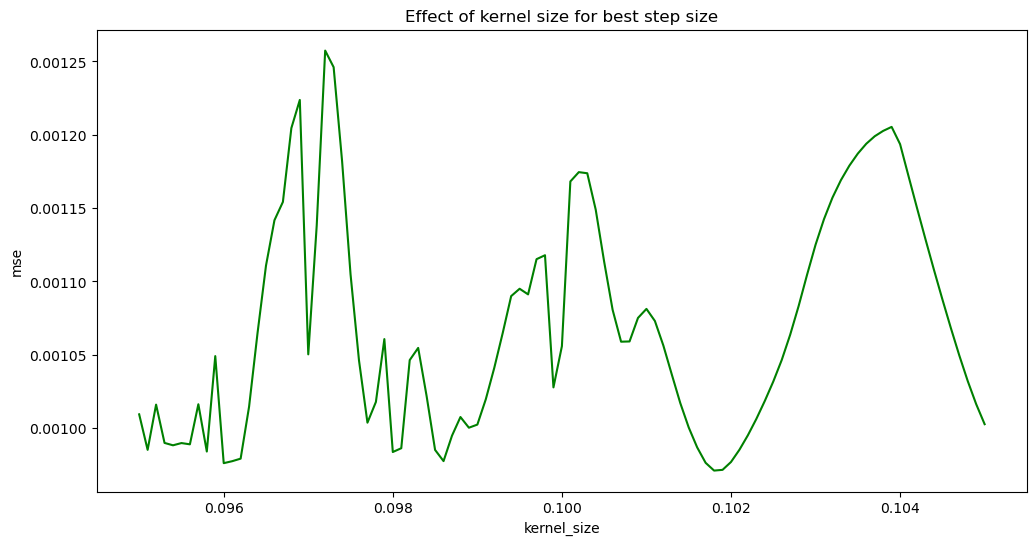

In [347]:
fig = plt.figure(figsize = (12,6))
plt.plot(kern_size_arr,np.min(mse_val_step,axis = 1),'-g')
plt.xlabel('kernel_size')
plt.ylabel('mse')
plt.title('Effect of kernel size for best step size')

Text(0.5, 1.0, 'Effect of step size on kernel')

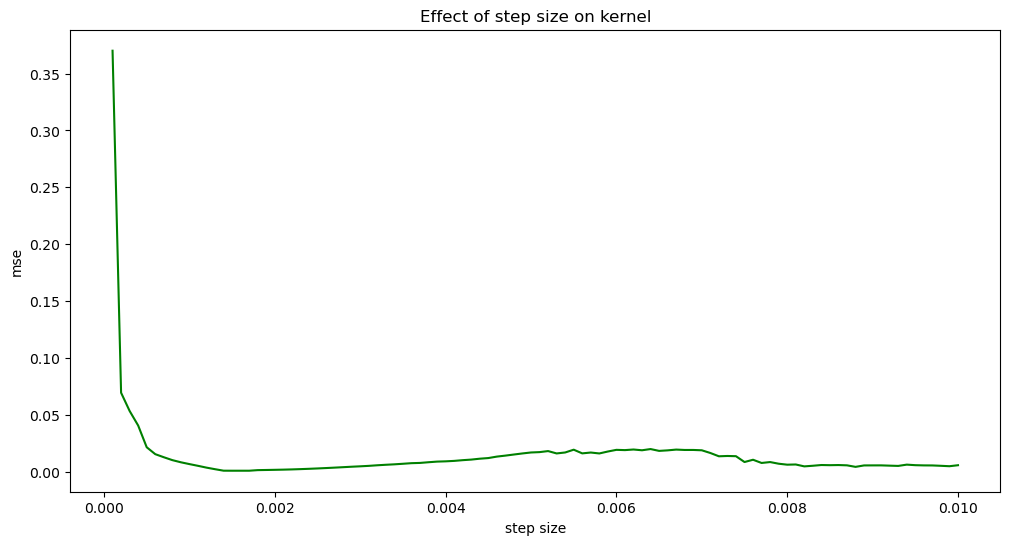

In [348]:
fig = plt.figure(figsize = (12,6))
plt.plot(step_size_arr,np.min(mse_val_step,axis = 0),'-g')
plt.xlabel('step size')
plt.ylabel('mse')
plt.title('Effect of step size on kernel')

0.1018
0.0015


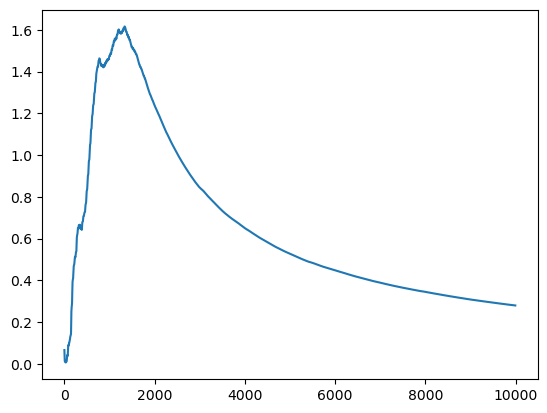

In [349]:
# taking step_size from the LMS with MCC
kern_size = kern_size_arr[kern_id]
step_size = step_size_arr[step_id]

y,e,w = algo_func.lms_mcc(ip_train,op_train,fil_order,step_size,kern_size)

plt.plot(algo_func.learn_curve(e))

print(kern_size)
print(step_size)

0.0012530877061443378


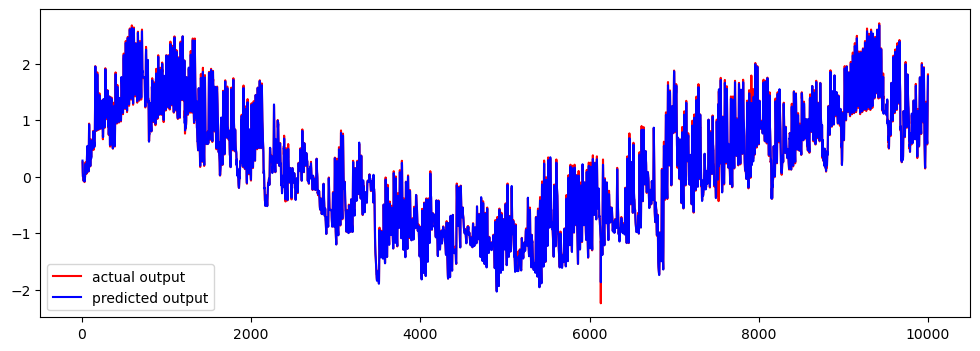

In [350]:
ser = np.arange(fil_order+1,len(ip_train))
fig = plt.figure(figsize = (12,4))
plt.plot(ser,op_train,'-r',label = 'actual output')
plt.plot(ser,pred(ip_train,w[-1]),'-b',label = 'predicted output')
plt.legend()
print(algo_func.mse(ip_train,op_train,w[-1]))

0.0009711532855782497


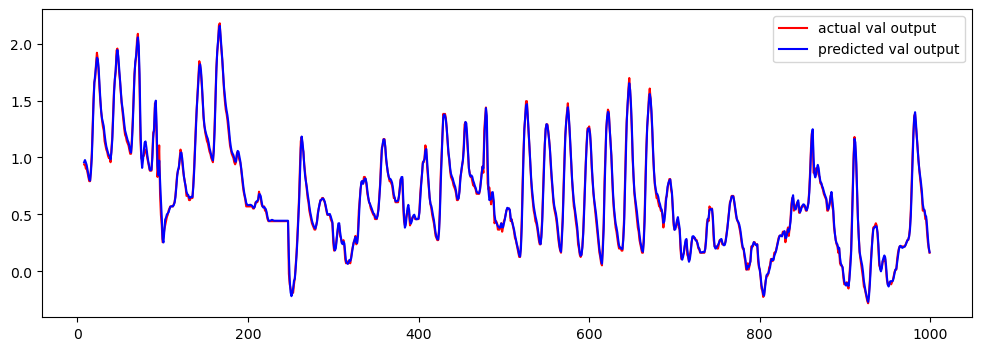

In [351]:
ser = np.arange(fil_order+1,len(ip_val))
fig = plt.figure(figsize = (12,4))
plt.plot(ser,op_val,'-r',label = 'actual val output')
plt.plot(ser,pred(ip_val,w[-1]),'-b',label = 'predicted val output')
plt.legend()
print(algo_func.mse(ip_val,op_val,w[-1]))

0.0009617073269514474


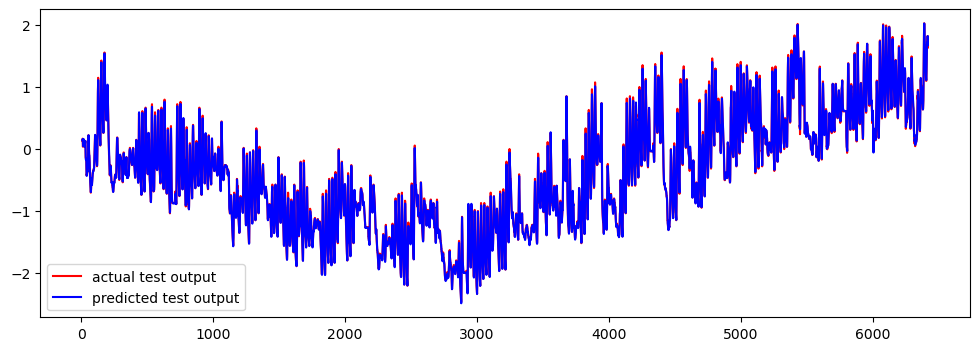

In [352]:
ser = np.arange(fil_order+1,len(ip_test))
fig = plt.figure(figsize = (12,4))
plt.plot(ser,op_test,'-r',label = 'actual test output')
plt.plot(ser,pred(ip_test,w[-1]),'-b',label = 'predicted test output')
plt.legend()
print(algo_func.mse(ip_test,op_test,w[-1]))

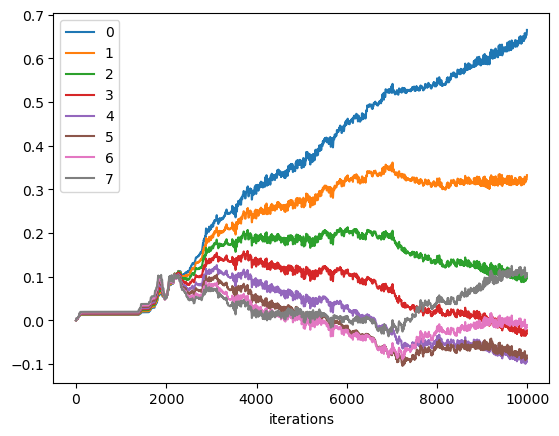

In [353]:
algo_func.wt_tracks(w)

In [360]:
importlib.reload(algo_func)

<module 'algo_func' from '/Users/skapoor/Desktop/academics/academics_2/mlts/project_2/algo_func.py'>

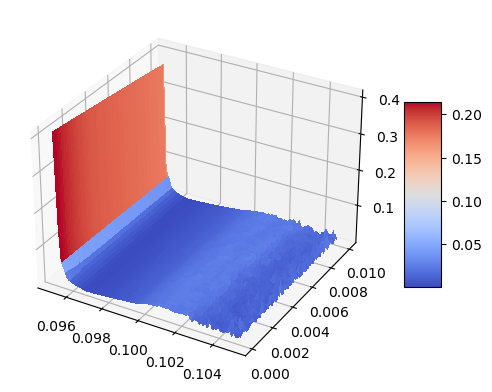

In [361]:
algo_func.plot3d(kern_size_arr,step_size_arr,mse_val_step)

In [181]:
step_size_arr = np.linspace(0.0001,0.01,100)
step_size_arr

array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024,
       0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032,
       0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004 ,
       0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0048,
       0.0049, 0.005 , 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056,
       0.0057, 0.0058, 0.0059, 0.006 , 0.0061, 0.0062, 0.0063, 0.0064,
       0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071, 0.0072,
       0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008 ,
       0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088,
       0.0089, 0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096,
       0.0097, 0.0098, 0.0099, 0.01  ])

In [182]:
kern_size_arr = np.linspace(0.095,0.105,101)
kern_size_arr

array([0.095 , 0.0951, 0.0952, 0.0953, 0.0954, 0.0955, 0.0956, 0.0957,
       0.0958, 0.0959, 0.096 , 0.0961, 0.0962, 0.0963, 0.0964, 0.0965,
       0.0966, 0.0967, 0.0968, 0.0969, 0.097 , 0.0971, 0.0972, 0.0973,
       0.0974, 0.0975, 0.0976, 0.0977, 0.0978, 0.0979, 0.098 , 0.0981,
       0.0982, 0.0983, 0.0984, 0.0985, 0.0986, 0.0987, 0.0988, 0.0989,
       0.099 , 0.0991, 0.0992, 0.0993, 0.0994, 0.0995, 0.0996, 0.0997,
       0.0998, 0.0999, 0.1   , 0.1001, 0.1002, 0.1003, 0.1004, 0.1005,
       0.1006, 0.1007, 0.1008, 0.1009, 0.101 , 0.1011, 0.1012, 0.1013,
       0.1014, 0.1015, 0.1016, 0.1017, 0.1018, 0.1019, 0.102 , 0.1021,
       0.1022, 0.1023, 0.1024, 0.1025, 0.1026, 0.1027, 0.1028, 0.1029,
       0.103 , 0.1031, 0.1032, 0.1033, 0.1034, 0.1035, 0.1036, 0.1037,
       0.1038, 0.1039, 0.104 , 0.1041, 0.1042, 0.1043, 0.1044, 0.1045,
       0.1046, 0.1047, 0.1048, 0.1049, 0.105 ])

In [238]:
ip_train[0:8].shape

(8, 1)

In [240]:
op_train[0].shape

(1,)

In [245]:
ip_1 = ip_train[0:8].T
centers = np.array(ip_1)

In [246]:
ip_1.shape

(1, 8)

In [250]:
centers = np.vstack((centers,ip_train[1:9].T))

In [251]:
centers.shape

(2, 8)

In [252]:
centers-ip_1

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.12937483, -0.05543444, -0.24028574, -0.14788127, -0.11091091,
        -0.03692816, -0.01850628, -0.01850612]])

In [260]:
def kern_3(centers,ip_1,kern_size):

    dist_list = np.linalg.norm((centers - ip_1),axis = 1)
    dist_list = dist_list**2
    val = np.exp((-1*dist_list)/(kern_size**2))
    val = np.expand_dims(val,axis = 0)
    return val

In [261]:
kern_3(centers,ip_1,1).shape

(1, 2)

In [339]:
importlib.reload(algo_func)

<module 'algo_func' from '/Users/skapoor/Desktop/academics/academics_2/mlts/project_2/algo_func.py'>

In [267]:
ip_train = train
op_train = train[fil_order+1:]

In [273]:
y,e,w = algo_func.KLMS_mse(ip_train[0:1_000],op_train[0:1_000-(fil_order+1)],fil_order,1,0.1)

100%|████████████████████████████████████████| 992/992 [00:03<00:00, 275.41it/s]


In [284]:
y_1,e_1,w_1 = algo_func.KLMS_mse_2(ip_train,op_train,fil_order,1,0.1)

100%|█████████████████████████████████████| 9991/9991 [00:01<00:00, 5982.33it/s]


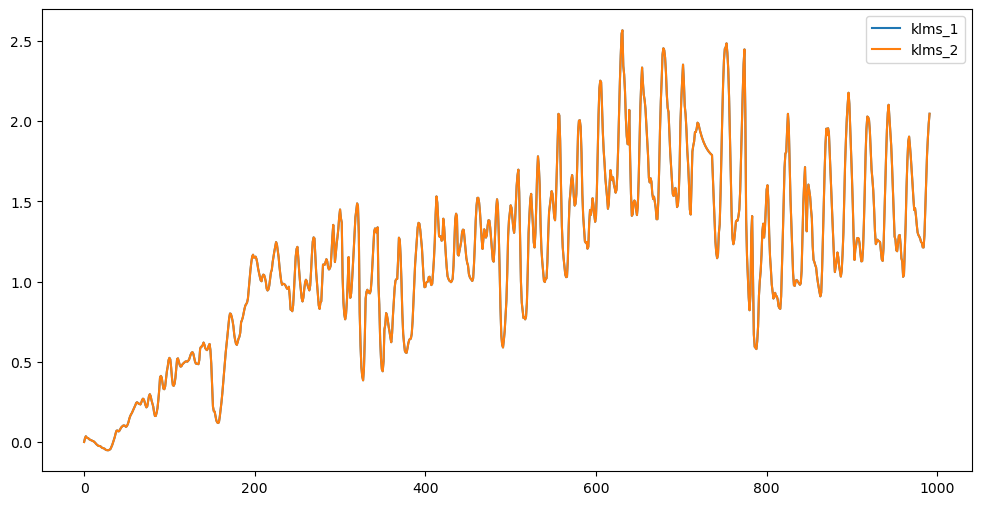

In [277]:
fig = plt.figure(figsize = (12,6))
plt.plot(y,label = 'klms_1')
plt.plot(y_1,label = 'klms_2')
plt.legend()

In [314]:
importlib.reload(algo_func)
y,e,cnt = algo_func.QKLMS_mse_2(ip_train,op_train,fil_order,1,0.1,0.1)

100%|█████████████████████████████████████| 9991/9991 [00:01<00:00, 5547.55it/s]


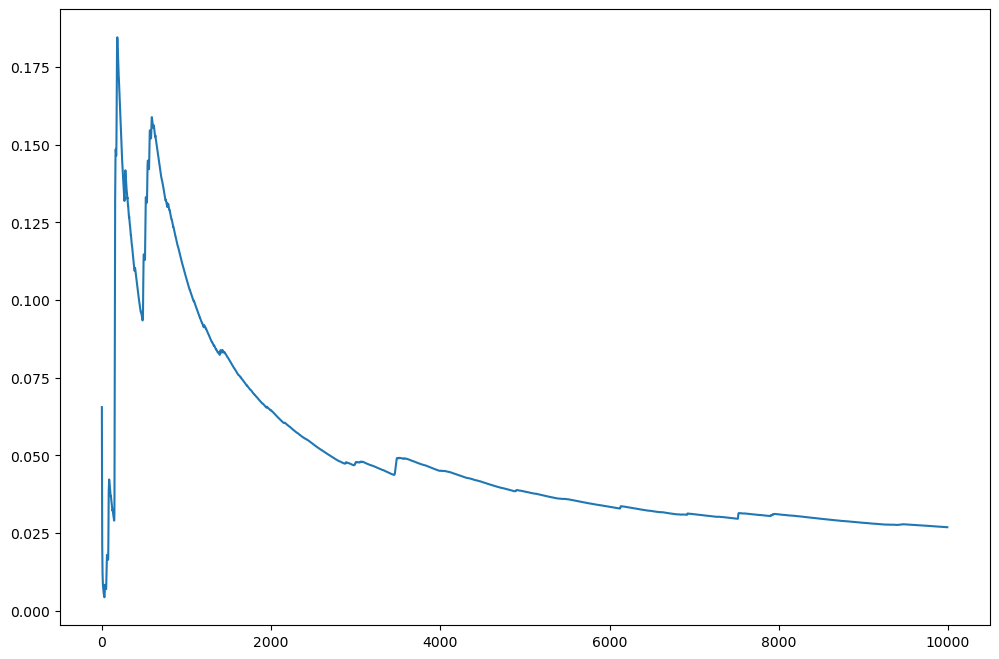

In [316]:
plt.plot(algo_func.learn_curve(e))

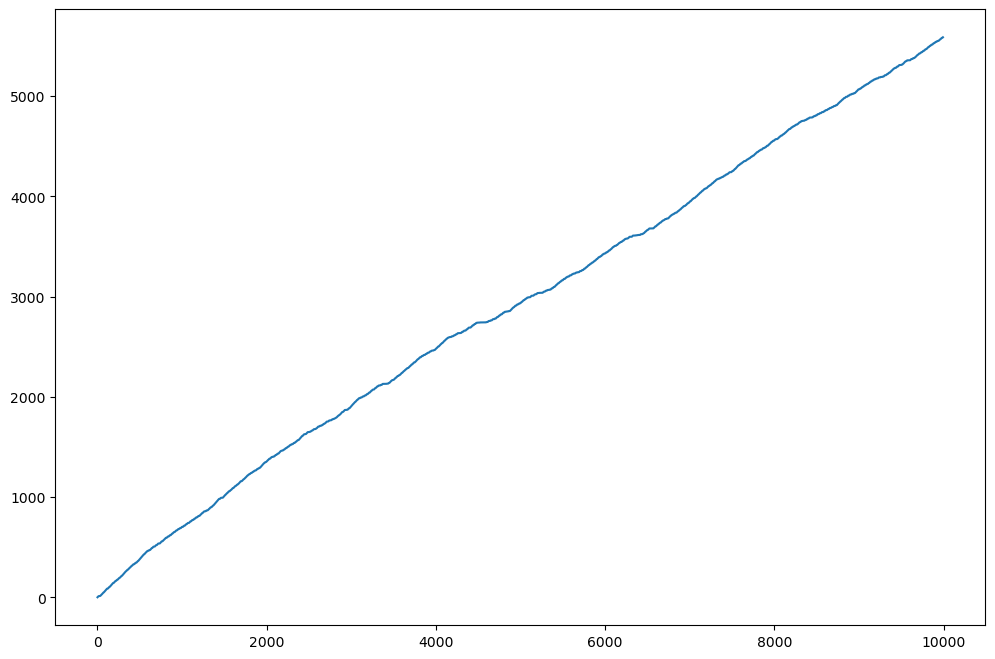

In [317]:
plt.plot(cnt)

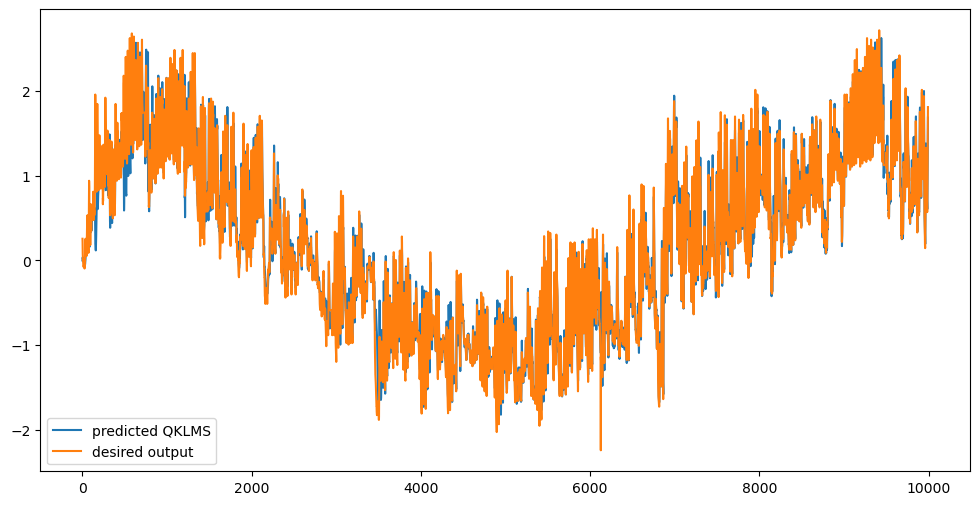

In [320]:
fig = plt.figure(figsize = (12,6))
plt.plot(y,label = 'predicted QKLMS')
plt.plot(op_train,label = 'desired output')
plt.legend()

In [304]:
centers

array([[1.01385425, 0.88447943, 0.82904499, 0.58875925, 0.44087799,
        0.32996708, 0.29303892, 0.27453264],
       [0.88447943, 0.82904499, 0.58875925, 0.44087799, 0.32996708,
        0.29303892, 0.27453264, 0.25602652]])

In [309]:
ip_1 = ip_train[2:2+fil_order+1].T

In [310]:
kern_3(centers,ip_1,1)

array([[0.6916821 , 0.90629015]])

In [311]:
kern_3(centers[0:1],ip_1,1)

array([[0.6916821]])

In [324]:
y,e,cnt = algo_func.KLMS_mcc_2(ip_train,op_train,fil_order)

100%|█████████████████████████████████████| 9991/9991 [00:02<00:00, 4964.02it/s]


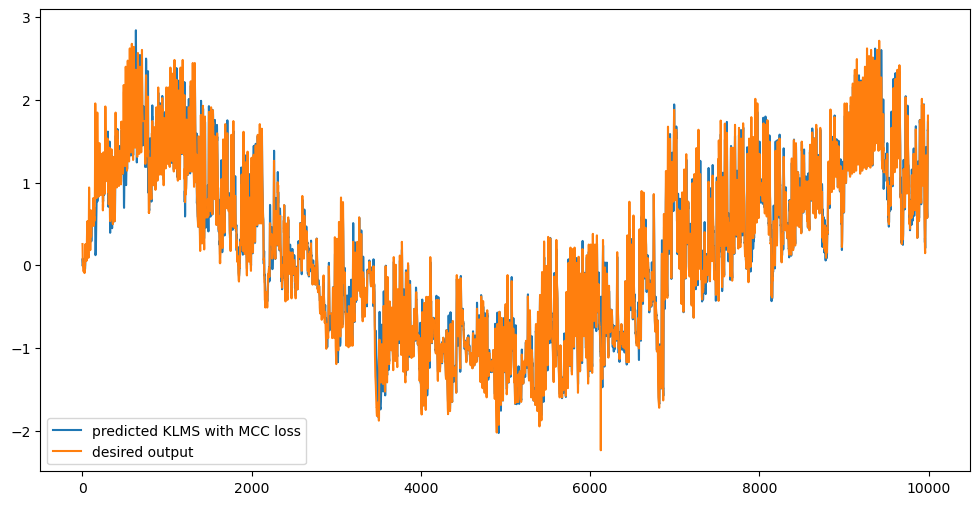

In [326]:
fig = plt.figure(figsize = (12,6))
plt.plot(y,label = 'predicted KLMS with MCC loss')
plt.plot(op_train,label = 'desired output')
plt.legend()

In [336]:
y,e,cnt = algo_func.QKLMS_mcc_2(ip_train,op_train,fil_order)

100%|█████████████████████████████████████| 9991/9991 [00:01<00:00, 5389.53it/s]


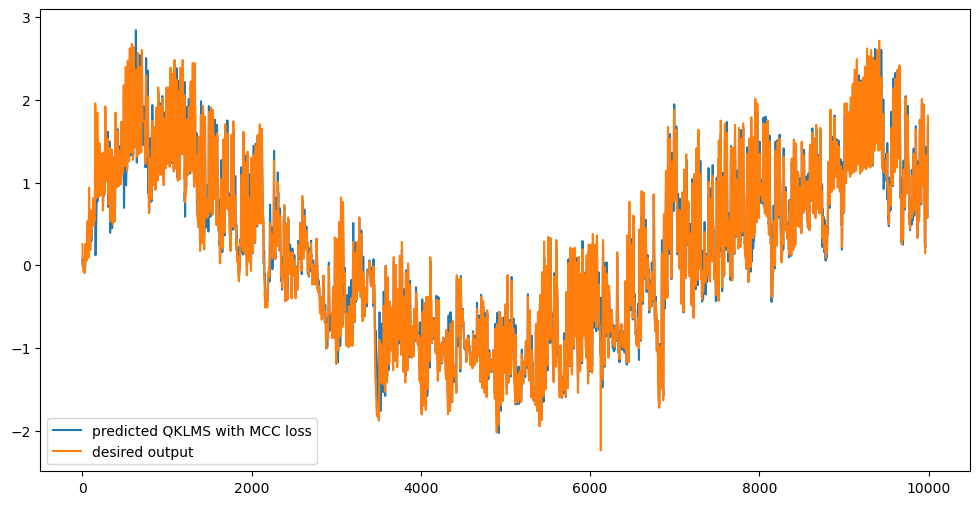

In [337]:
fig = plt.figure(figsize = (12,6))
plt.plot(y,label = 'predicted QKLMS with MCC loss')
plt.plot(op_train,label = 'desired output')
plt.legend()

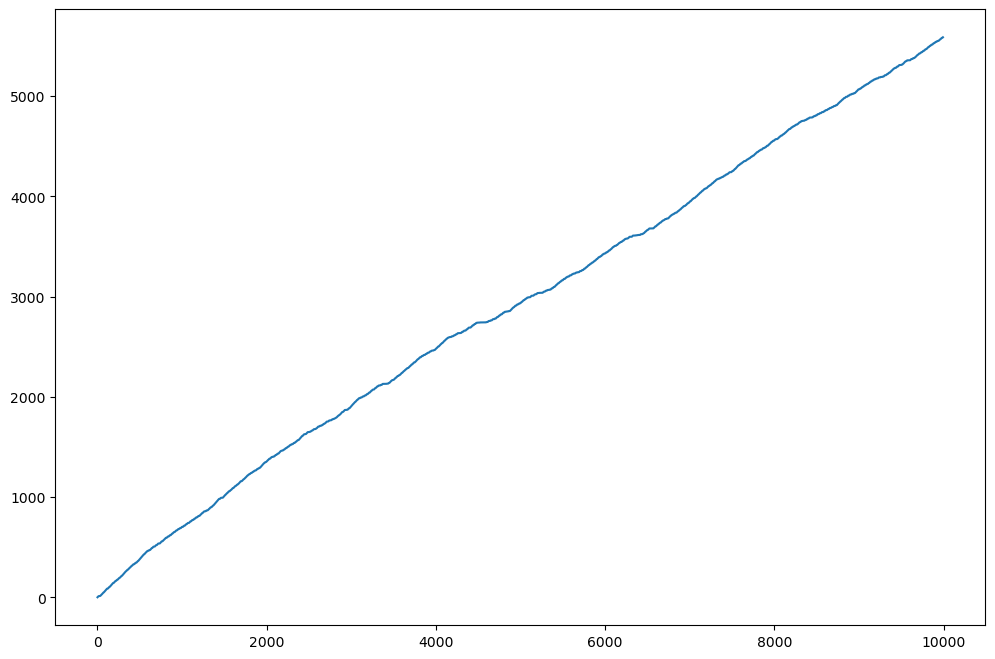

In [338]:
plt.plot(cnt)

### Optimizing for the KLMS MSE

In [361]:
importlib.reload(algo_func)

<module 'algo_func' from '/Users/skapoor/Desktop/academics/academics_2/mlts/project_2/algo_func.py'>

In [356]:
rk_size_arr = np.linspace(0.5,1.5,3)
step_size_arr = np.linspace(0.05,0.15,3)

k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

klms_mse_val = np.zeros((k1,k2))

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

for i in tqdm(range(k1)):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,e,centers,cnt = algo_func.KLMS_mse_2(ip_train,op_train,fil_order,rk_size,step_size)
        klms_mse_val[i][j] = algo_func.klms_mseror(ip_val,op_val,fil_order,e,centers,rk_size,step_size)

3 3


100%|█████████████████████████████████████████████| 3/3 [00:11<00:00,  3.78s/it]


In [358]:
klms_mse_val

array([[0.01566911, 0.01257403, 0.01175509],
       [0.01023747, 0.00930467, 0.00962627],
       [0.01132713, 0.0118142 , 0.01327242]])

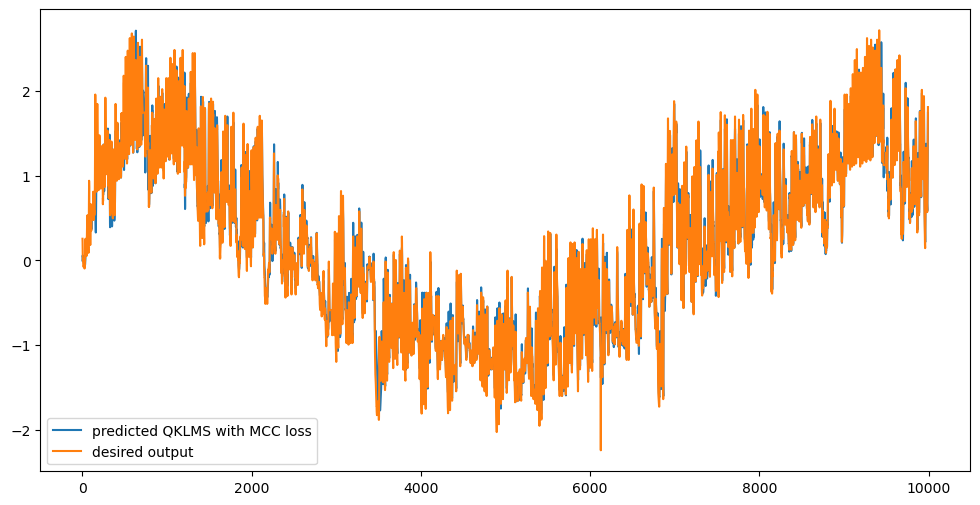

In [359]:
fig = plt.figure(figsize = (12,6))
plt.plot(y,label = 'predicted QKLMS with MCC loss')
plt.plot(op_train,label = 'desired output')
plt.legend()

In [360]:
np.average(e**2)

0.016293988020382233

In [376]:
rk_size = 1
step_size = 0.1

y,e,centers,cnt = algo_func.KLMS_mse_2(ip_train,op_train,fil_order,rk_size,step_size)
pred = algo_func.klms_pred(ip_test,op_test,fil_order,e,centers,rk_size,step_size)
print(pred.shape)
eror = op_test - pred
np.average((eror**2)[1000:])

(6412, 1)


0.062323616610480935

In [377]:
np.average((eror**2)[1000:])

0.062323616610480935

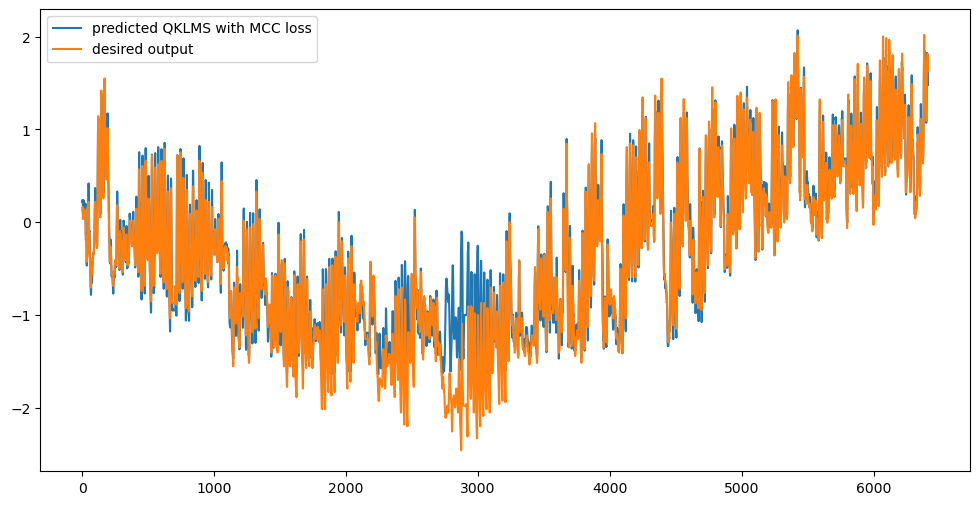

In [378]:
fig = plt.figure(figsize = (12,6))
plt.plot(pred,label = 'predicted QKLMS with MCC loss')
plt.plot(op_test,label = 'desired output')
plt.legend()

In [415]:
#uptil now best k = 0.922 and eta = 0.109

rk_size_arr = [0.922]
step_size_arr = [0.109]

k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

klms_mse_val = np.zeros((k1,k2))

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

for i in tqdm(range(k1)):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,e,centers,cnt = algo_func.KLMS_mse_2(ip_train,op_train,fil_order,rk_size,step_size)
        klms_mse_val[i][j] = algo_func.klms_mseror(ip_val,op_val,fil_order,e,centers,rk_size,step_size)

1 1


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.20s/it]


In [416]:
klms_mse_val

array([[0.0092154]])

Other things to do is to find the best stuff for QKLMS, KLMS with MCC, QKLMS with MCC.

In [64]:
importlib.reload(algo_func)

<module 'algo_func' from '/Users/skapoor/Desktop/academics/academics_2/mlts/project_2/algo_func.py'>

In [42]:
#uptil now best k = 0.4 and eta = 0.9
# this is for QKLMS with MSE
rk_size_arr = [0.922]
step_size_arr = [0.109]
threshold_arr = [0.0]

k1,k2 = len(rk_size_arr),len(step_size_arr)
k3 = len(threshold_arr)
#print(k1,k2)

qklms_mse_val = np.zeros((k3,1))

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

for i in tqdm(range(k3)):
    
    rk_size = rk_size_arr[0]
    step_size = step_size_arr[0]
    threshold = threshold_arr[i]
    y,e,centers,alpha,cnt = algo_func.QKLMS_mse_2(ip_train,op_train,fil_order,rk_size,step_size,threshold)
    qklms_mse_val[i] = algo_func.klms_mseror(ip_val,op_val,fil_order,alpha,centers,rk_size,step_size)

100%|█████████████████████████████████████████████| 1/1 [00:03<00:00,  3.22s/it]


In [57]:
#best uptil now 0.4,0.9 for qklms

rk_size_arr = np.linspace(0.39,0.41,11)
step_size_arr = np.linspace(0.89,0.91,11)
threshold_arr = [0.0]
k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

qklms_mse_val = np.zeros((k1,k2))

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

threshold = threshold_arr[0]

for i in tqdm(range(k1)):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,e,centers,alpha,cnt = algo_func.QKLMS_mse_2(ip_train,op_train,fil_order,rk_size,step_size,threshold)
        qklms_mse_val[i][j] = algo_func.klms_mseror(ip_val,op_val,fil_order,alpha,centers,rk_size,step_size)

11 11


100%|███████████████████████████████████████████| 11/11 [06:39<00:00, 36.32s/it]


In [58]:
print(np.min(qklms_mse_val))
print(np.argmin(qklms_mse_val))

0.02333463614472666
5


In [59]:
qklms_mse_val

array([[0.02340503, 0.02337766, 0.02335694, 0.02334285, 0.02333542,
        0.02333464, 0.02334052, 0.02335306, 0.02337229, 0.02339819,
        0.02343078],
       [0.02343047, 0.02340388, 0.02338392, 0.02337061, 0.02336395,
        0.02336394, 0.02337059, 0.0233839 , 0.0234039 , 0.02343057,
        0.02346392],
       [0.02345725, 0.02343138, 0.02341214, 0.02339955, 0.0233936 ,
        0.0233943 , 0.02340166, 0.02341569, 0.02343639, 0.02346377,
        0.02349783],
       [0.02348519, 0.02345998, 0.02344141, 0.02342947, 0.02342418,
        0.02342554, 0.02343356, 0.02344823, 0.02346958, 0.0234976 ,
        0.0235323 ],
       [0.02351412, 0.02348952, 0.02347155, 0.02346022, 0.02345552,
        0.02345748, 0.02346608, 0.02348135, 0.02350328, 0.02353188,
        0.02356715],
       [0.02354387, 0.02351982, 0.0235024 , 0.02349161, 0.02348745,
        0.02348994, 0.02349907, 0.02351486, 0.02353731, 0.02356643,
        0.02360221],
       [0.0235743 , 0.02355074, 0.0235338 , 0.02352349, 0.

In [60]:
i_min = 5//11
j_min = 5%11
print(rk_size_arr[i_min])
print(step_size_arr[j_min])

0.39
0.9


In [75]:
ip_test = test
op_test = test[fil_order+1:]

In [76]:
y,e,centers,cnt = algo_func.KLMS_mse_2(ip_train,op_train,fil_order,0.922,0.109)
print(algo_func.klms_mseror(ip_val,op_val,fil_order,e,centers,0.922,0.109))
print(algo_func.klms_mseror(ip_test,op_test,fil_order,e,centers,0.922,0.109))

0.009215401587634063
0.05692477757266591


In [78]:
rk_size = 0.39
step_size = 0.9

y,e,centers,cnt = algo_func.KLMS_mse_2(ip_train,op_train,fil_order,rk_size,step_size)
print(algo_func.klms_mseror(ip_val,op_val,fil_order,e,centers,rk_size,step_size))
print(algo_func.klms_mseror(ip_test,op_test,fil_order,e,centers,rk_size,step_size))

0.02773606889984374
0.09376921428161014


In [80]:
rk_size = 0.39
step_size = 0.9

y,e,centers,alpha,cnt = algo_func.QKLMS_mse_2(ip_train,op_train,fil_order,rk_size,step_size,0.0)
print(algo_func.klms_mseror(ip_val,op_val,fil_order,alpha,centers,rk_size,step_size))
print(algo_func.klms_mseror(ip_test,op_test,fil_order,alpha,centers,rk_size,step_size))

0.02333463614472666
0.10718579118035904


In [72]:
#uptil now best k = 0.922 and eta = 0.109

rk_size_arr = np.linspace(0.39,0.41,11)
step_size_arr = np.linspace(0.89,0.91,11)

k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

klms_mse_val = np.zeros((k1,k2))

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

for i in tqdm(range(k1)):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,e,centers,cnt = algo_func.KLMS_mse_2(ip_train,op_train,fil_order,rk_size,step_size)
        klms_mse_val[i][j] = algo_func.klms_mseror(ip_val,op_val,fil_order,e,centers,rk_size,step_size)

11 11


100%|███████████████████████████████████████████| 11/11 [04:01<00:00, 21.96s/it]


In [73]:
print(np.min(klms_mse_val))
print(np.argmin(klms_mse_val))

0.027357065737263958
0


#### Question 1

*to estimate weight tracks for KLMS MSE first we used step sizes and kernel size with the power of 10. After that we zeroed out on the kernel size and step size by adjust 0.1 factor around it and then finding the minimum*

#### Question 2
Show the convergence of LMS, KLMS, QKLMS and their prediction on the test dataset

In [107]:
step_size_best = 0.0142

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

ip_test = test
op_test = test[fil_order+1:]

y,e_lms,w = algo_func.lms_mse(ip_train,op_train,fil_order,step_size_best)
print(algo_func.mse(ip_train,op_train,w[-1]))
print(algo_func.mse(ip_val,op_val,w[-1]))
print(algo_func.mse(ip_test,op_test,w[-1]))

100%|███████████████████████████████████| 9992/9992 [00:00<00:00, 126951.89it/s]

6.358490129374353e-09
3.7037002550845217e-09
5.651811153281211e-09


In [113]:
#uptil now best k = 0.922 and eta = 0.109

rk_size_arr = [0.922]
step_size_arr = [0.109]

k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

klms_mse_val = np.zeros((k1,k2))
klms_mse_test = np.zeros((k1,k2))

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

for i in tqdm(range(k1)):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,e_klms,centers,cnt = algo_func.KLMS_mse_2(ip_train,op_train,fil_order,rk_size,step_size)
        klms_mse_val[i][j] = algo_func.klms_mseror(ip_val,op_val,fil_order,e_klms,centers,rk_size,step_size)
        klms_mse_test[i][j] = algo_func.klms_mseror(ip_test,op_test,fil_order,e_klms,centers,rk_size,step_size)
        
print(klms_mse_val)
print(klms_mse_test)

1 1


100%|█████████████████████████████████████████████| 1/1 [00:03<00:00,  3.87s/it]

[[0.0092154]]
[[0.05692478]]


In [111]:
rk_size = 0.39
step_size = 0.9

y,e_qklms,centers,alpha,cnt = algo_func.QKLMS_mse_2(ip_train,op_train,fil_order,rk_size,step_size,0.0)
print(algo_func.klms_mseror(ip_val,op_val,fil_order,alpha,centers,rk_size,step_size))
print(algo_func.klms_mseror(ip_test,op_test,fil_order,alpha,centers,rk_size,step_size))

0.02333463614472666
0.10718579118035904


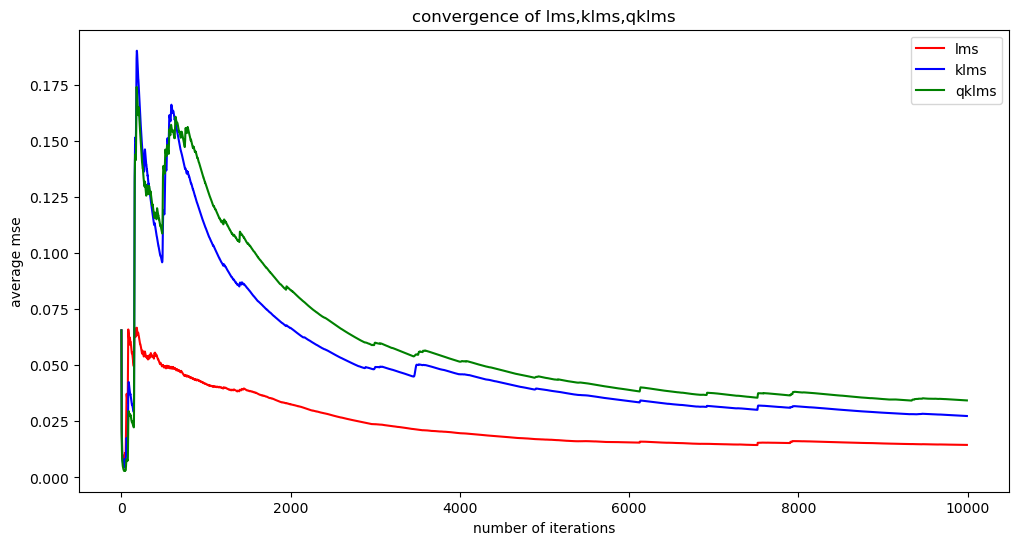

In [116]:
fig = plt.figure(figsize = (12,6))
plt.plot(algo_func.learn_curve(e_lms),'-r',label ='lms')
plt.plot(algo_func.learn_curve(e_klms),'-b',label ='klms')
plt.plot(algo_func.learn_curve(e_qklms),'-g',label ='qklms')
plt.xlabel('number of iterations')
plt.ylabel('average mse')
plt.title('convergence of lms,klms,qklms')
plt.legend()

#### Question 3

*the trade off accuracy versus number of samples*

This will be done by choosing different threshold values. After choosing them plotting the average mse vs number of samples produced by that threshold values.

In [101]:
#uptil now best k = 0.4 and eta = 0.9
# this is for QKLMS with MSE
rk_size_arr = [0.4]
step_size_arr = [0.9]
threshold_arr = np.concatenate((np.linspace(0.01,0.1,10),np.linspace(0.1,1,10)))
cnt_arr = []

k1,k2 = len(rk_size_arr),len(step_size_arr)
k3 = len(threshold_arr)
#print(k1,k2)

qklms_mse_val = np.zeros((k3,1))
qklms_mse_test = np.zeros((k3,1))

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

ip_test = test
op_test = test[fil_order+1:]

for i in tqdm(range(k3)):
    
    rk_size = rk_size_arr[0]
    step_size = step_size_arr[0]
    threshold = threshold_arr[i]
    y,e,centers,alpha,cnt = algo_func.QKLMS_mse_2(ip_train,op_train,fil_order,rk_size,step_size,threshold)
    qklms_mse_val[i] = algo_func.klms_mseror(ip_val,op_val,fil_order,alpha,centers,rk_size,step_size)
    qklms_mse_test[i] = algo_func.klms_mseror(ip_test,op_test,fil_order,alpha,centers,rk_size,step_size)
    cnt_arr.append(cnt[-1])

100%|███████████████████████████████████████████| 20/20 [00:53<00:00,  2.65s/it]


Text(0.5, 1.0, 'avg mse vs no. of samples in QKLMS')

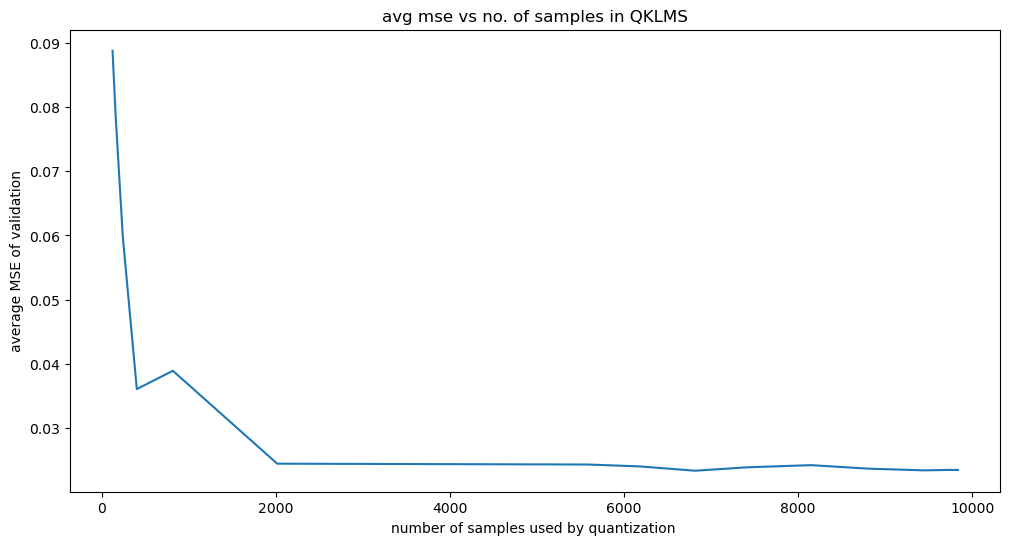

In [104]:
fig = plt.figure(figsize = (12,6))
plt.plot(cnt_arr[:-3],qklms_mse_val[:-3])
plt.xlabel('number of samples used by quantization ')
plt.ylabel('average MSE of validation')
plt.title('avg mse vs no. of samples in QKLMS')

Text(0.5, 1.0, 'threshold vs network size')

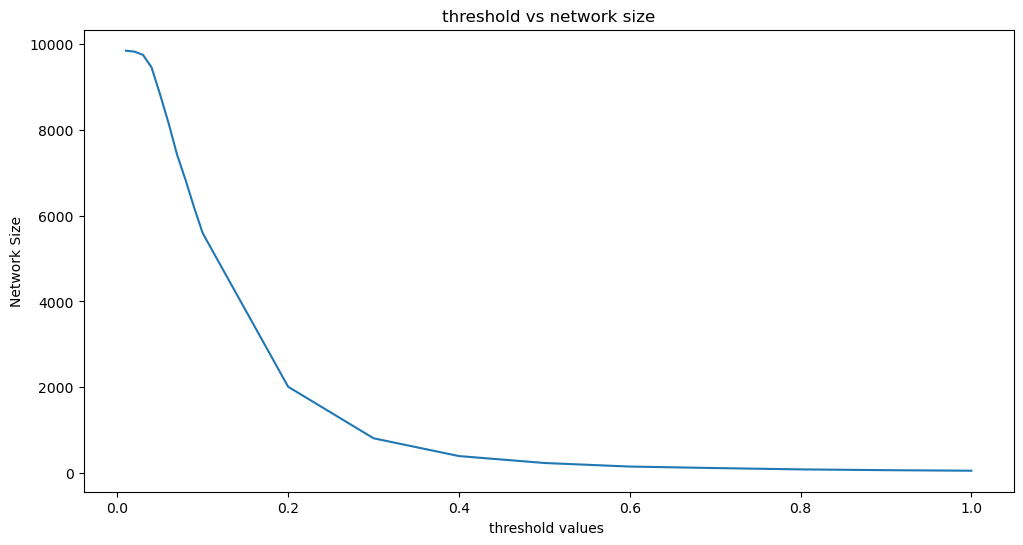

In [105]:
fig = plt.figure(figsize = (12,6))
plt.plot(threshold_arr,cnt_arr)
plt.xlabel('threshold values ')
plt.ylabel('Network Size')
plt.title('threshold vs network size')

#### Using MCC on KLMS

In [126]:
# rkhs kernel size 1 with 0.04 step size. 

In [123]:
#uptil now best k = 0.922 and eta = 0.109

rk_size_arr = [1]
step_size_arr = np.linspace(0.01,0.1,10)
kern_size = 1

k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

klms_mcc_val = np.zeros((k1,k2))
klms_mcc_test = np.zeros((k1,k2))

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

for i in tqdm(range(k1)):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,e,centers,cnt = algo_func.KLMS_mcc_2(ip_train,op_train,fil_order,rk_size,step_size,kern_size)
        step_size = step_size/(kern_size**2)
        klms_mcc_val[i][j] = algo_func.klms_mseror(ip_val,op_val,fil_order,e,centers,rk_size,step_size)
        klms_mcc_test[i][j] = algo_func.klms_mseror(ip_test,op_test,fil_order,e,centers,rk_size,step_size)
        
print(klms_mcc_val)
print(klms_mcc_test)

1 10


100%|█████████████████████████████████████████████| 1/1 [00:43<00:00, 43.17s/it]

[[0.10360601 0.10029971 0.09861439 0.098597   0.09928256 0.10033217
  0.10163727 0.10308341 0.10457899 0.10607808]]
[[0.26337955 0.2379108  0.23539393 0.24091111 0.24989388 0.26043772
  0.27124066 0.28156945 0.29112045 0.29982757]]


In [179]:


rk_size_arr = [1.075]
step_size_arr = [0.085]
kern_size_arr = [0.805]

k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

k3 = len(kern_size_arr)

klms_mcc_val = np.zeros((k3,1))
klms_mcc_test = np.zeros((k3,1))

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

for i in tqdm(range(k3)):
    
    rk_size = rk_size_arr[0]
    step_size = step_size_arr[0]
    kern_size = kern_size_arr[i]
    y,e,centers,cnt = algo_func.KLMS_mcc_2(ip_train,op_train,fil_order,rk_size,step_size,kern_size)
    step_size = step_size/(kern_size**2)
    klms_mcc_val[i] = algo_func.klms_mseror(ip_val,op_val,fil_order,e,centers,rk_size,step_size)
    klms_mcc_test[i] = algo_func.klms_mseror(ip_test,op_test,fil_order,e,centers,rk_size,step_size)
        
print(klms_mcc_val)
print(klms_mcc_test)

1 1


100%|█████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.72s/it]

[[0.03369594]]
[[0.17280206]]


In [165]:
#uptil now best k = 0.922 and eta = 0.109

rk_size_arr = np.linspace(1.05,1.15,5)
step_size_arr = np.linspace(0.085,0.095,5)
kern_size_arr = np.linspace(0.805,0.815,5)

k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

k3 = len(kern_size_arr)

klms_mcc_val = np.zeros((k1,k2,k3))
klms_mcc_test = np.zeros((k1,k2,k3))

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

for i in tqdm(range(k1)):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
    
        for k in range(k3):
            
            step_size = step_size_arr[j]
            kern_size = kern_size_arr[k]
            y,e,centers,cnt = algo_func.KLMS_mcc_2(ip_train,op_train,fil_order,rk_size,step_size,kern_size)
            step_size = step_size/(kern_size**2)
            klms_mcc_val[i][j][k] = algo_func.klms_mseror(ip_val,op_val,fil_order,e,centers,rk_size,step_size)
            klms_mcc_test[i][j][k] = algo_func.klms_mseror(ip_test,op_test,fil_order,e,centers,rk_size,step_size)
        
print(klms_mcc_val)
print(klms_mcc_test)

5 5


100%|█████████████████████████████████████████████| 5/5 [05:32<00:00, 66.53s/it]

[[[0.03383071 0.05974215 0.12710872 0.30043286 0.61373991]
  [0.03466107 0.06266414 0.13453796 0.31936219 0.63495787]
  [0.03558673 0.06568413 0.14226876 0.33868908 0.65520698]
  [0.03659982 0.06880179 0.15030709 0.35833094 0.67489533]
  [0.03769351 0.0720173  0.15865793 0.37819833 0.69455634]]

 [[0.03369594 0.06126809 0.13147348 0.31558342 0.65924046]
  [0.03466643 0.06429843 0.13929006 0.33588769 0.6823705 ]
  [0.03572283 0.06742907 0.14743485 0.35666583 0.70381858]
  [0.03685813 0.0706607  0.15591423 0.37783606 0.72374851]
  [0.03806636 0.07399452 0.16473344 0.39930892 0.7424198 ]]

 [[0.03381367 0.06280701 0.13570321 0.32943815 0.69683363]
  [0.03490456 0.06593615 0.14388348 0.35093421 0.72038328]
  [0.03607278 0.06916881 0.15241475 0.37296756 0.74122794]
  [0.03731227 0.07250663 0.16130338 0.39545736 0.75926021]
  [0.03861791 0.07595163 0.17055459 0.41831399 0.77444836]]

 [[0.03414262 0.06436751 0.13978097 0.3417582  0.73115658]
  [0.03533674 0.06758846 0.14829224 0.364246   0.7

In [195]:
#uptil now best k = 0.922 and eta = 0.109

rk_size_arr = np.linspace(1.05,1.15,5)
step_size_arr = np.linspace(0.085,0.095,5)
kern_size_arr = np.linspace(0.805,0.815,5)

k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

k3 = len(kern_size_arr)

klms_mcc_val = np.zeros((k1,k2,k3))
klms_mcc_test = np.zeros((k1,k2,k3))

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

for i in tqdm(range(k1)):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
    
        for k in range(k3):
            
            step_size = step_size_arr[j]
            kern_size = kern_size_arr[k]
            y,e,centers,cnt = algo_func.KLMS_mcc_2(ip_train,op_train,fil_order,rk_size,step_size,kern_size)
            step_size = step_size/(kern_size**2)
            klms_mcc_val[i][j][k] = algo_func.klms_mseror(ip_val,op_val,fil_order,e,centers,rk_size,step_size)
            klms_mcc_test[i][j][k] = algo_func.klms_mseror(ip_test,op_test,fil_order,e,centers,rk_size,step_size)
        
print(klms_mcc_val)
print(klms_mcc_test)

5 5


100%|█████████████████████████████████████████████████| 5/5 [05:26<00:00, 65.28s/it]

[[[0.03383071 0.03382542 0.03387238 0.03396958 0.03411507]
  [0.03466107 0.03465729 0.03470503 0.03480233 0.03494727]
  [0.03558673 0.03558061 0.03562544 0.03571928 0.03586028]
  [0.03659982 0.03658789 0.03662646 0.03671364 0.0368476 ]
  [0.03769351 0.03767259 0.03770187 0.03777947 0.0379036 ]]

 [[0.03369594 0.03370963 0.03377388 0.03388674 0.03404638]
  [0.03466643 0.03467593 0.03473549 0.0348432  0.03499727]
  [0.03572283 0.03572468 0.03577622 0.03587559 0.036021  ]
  [0.03685813 0.03684921 0.03688972 0.03697784 0.03711182]
  [0.03806636 0.0380438  0.03807055 0.03814479 0.03826479]]

 [[0.03381367 0.03383466 0.033905   0.03402283 0.03418638]
  [0.03490456 0.03491639 0.03497725 0.03508534 0.03523891]
  [0.03607278 0.03607233 0.03612073 0.03621619 0.03635699]
  [0.03731227 0.03729671 0.03732992 0.03741014 0.03753565]
  [0.03861791 0.03858467 0.03860022 0.03866279 0.0387707 ]]

 [[0.03414262 0.03416137 0.03422867 0.03434272 0.03450183]
  [0.03533674 0.03534199 0.03539564 0.03549595 0.0

In [166]:
ind = np.unravel_index(np.argmin(klms_mcc_val, axis=None), klms_mcc_val.shape)

In [167]:
klms_mcc_val[ind]

0.03369593512666118

In [168]:
ind

(1, 0, 0)

In [158]:
rk_size_arr[ind[0]]

1.1

In [162]:
kern_size_arr

[0.81]

In [176]:
importlib.reload(algo_func)

<module 'algo_func' from '/Users/skapoor/Desktop/academics/academics_2/mlts/project_2/algo_func.py'>

In [190]:
#uptil now best k = 0.922 and eta = 0.109

rk_size_arr = np.linspace(1.05,1.15,5)
step_size_arr = np.linspace(0.085,0.095,5)
kern_size_arr = np.linspace(0.805,0.815,5)
threshold_arr = [0e-16]

k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

k3 = len(kern_size_arr)

klms_mcc_val = np.zeros((k1,k2,k3))
klms_mcc_test = np.zeros((k1,k2,k3))

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

for i in tqdm(range(k1)):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
    
        step_size = step_size_arr[j]
    
        for k in range(k3):
        
            kern_size = kern_size_arr[k]
            y,e,centers,alpha,cnt = algo_func.QKLMS_mcc_2(ip_train,op_train,fil_order,rk_size,step_size,kern_size)
            step_size = step_size/(kern_size**2)
            klms_mcc_val[i][j][k] = algo_func.klms_mseror(ip_val,op_val,fil_order,alpha,centers,rk_size,step_size)
            klms_mcc_test[i][j][k] = algo_func.klms_mseror(ip_test,op_test,fil_order,alpha,centers,rk_size,step_size)
        
print(klms_mcc_val)
print(klms_mcc_test)

5 5


100%|█████████████████████████████████████████████████| 5/5 [00:31<00:00,  6.35s/it]

[[[0.46774596 0.39280989 0.28938694 0.16176937 0.07348329]
  [0.4635302  0.3867308  0.28109204 0.15289457 0.07264432]
  [0.45933052 0.38068376 0.27289759 0.14442957 0.07300339]
  [0.45514656 0.37466879 0.26480753 0.13638675 0.074596  ]
  [0.450978   0.36868599 0.256826   0.1287777  0.07747048]]

 [[0.46763863 0.39240214 0.28818227 0.15924002 0.06944251]
  [0.46341035 0.38628556 0.27981288 0.15025923 0.06845815]
  [0.45919728 0.38019991 0.27154345 0.14169102 0.06865198]
  [0.45499906 0.37414526 0.26337806 0.13354812 0.07005357]
  [0.45081537 0.36812181 0.2553209  0.1258424  0.07270517]]

 [[0.46753215 0.39201198 0.28708326 0.15688065 0.06543854]
  [0.46329158 0.38586129 0.27864756 0.14778797 0.06434387]
  [0.45906539 0.37974065 0.27031112 0.13910872 0.0644296 ]
  [0.45485327 0.37365022 0.26207802 0.13085605 0.06572372]
  [0.45065492 0.36759024 0.25395248 0.12304225 0.06826671]]

 [[0.46742706 0.39164527 0.28610929 0.15475874 0.06179069]
  [0.46317459 0.38546438 0.27761713 0.14555471 0.0

In [191]:
ind = np.unravel_index(np.argmin(klms_mcc_val, axis=None), klms_mcc_val.shape)
print(klms_mcc_val[ind])
print(ind)

0.0577157780187438
(4, 1, 4)


In [192]:
print(rk_size_arr[4])
print(step_size_arr[1])
print(kern_size_arr[4])

1.15
0.08750000000000001
0.815


In [194]:
#uptil now best k = 0.922 and eta = 0.109

rk_size_arr = [1.15]
step_size_arr = [0.08750000000000001]
kern_size_arr = [0.815]
threshold_arr = [0e-16]

k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

k3 = len(kern_size_arr)

klms_mcc_val = np.zeros((k1,k2,k3))
klms_mcc_test = np.zeros((k1,k2,k3))

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

for i in tqdm(range(k1)):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
    
        step_size = step_size_arr[j]
    
        for k in range(k3):
        
            kern_size = kern_size_arr[k]
            y,e,centers,alpha,cnt = algo_func.QKLMS_mcc_2(ip_train,op_train,fil_order,rk_size,step_size,kern_size)
            step_size = step_size/(kern_size**2)
            klms_mcc_val[i][j][k] = algo_func.klms_mseror(ip_val,op_val,fil_order,alpha,centers,rk_size,step_size)
            klms_mcc_test[i][j][k] = algo_func.klms_mseror(ip_test,op_test,fil_order,alpha,centers,rk_size,step_size)
        
print(klms_mcc_val)
print(klms_mcc_test)

1 1


100%|█████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.34it/s]

[[[0.46616431]]]
[[[0.75579082]]]


In [186]:
ind = np.unravel_index(np.argmin(klms_mcc_val, axis=None), klms_mcc_val.shape)
print(klms_mcc_val[ind])
print(ind)

print(rk_size_arr[4])
print(step_size_arr[1])
print(kern_size_arr[4])

0.061656391856171174
(2, 4, 4)
1.3
0.08750000000000001
0.83


In [199]:
np.std(ot_)

0.9999999999999998

In [200]:
np.std(op_train)

1.016991604696784

#### Trajectory generation for lms with threshold = 1/5 of std of ot_

In [307]:
importlib.reload(algo_func)

<module 'algo_func' from '/Users/skapoor/Desktop/academics/academics_2/mlts/project_2/algo_func.py'>

In [208]:
ot_threshold = 0.2*np.std(ot_)
ot_threshold = round(ot_threshold,5)
print(ot_threshold)

0.2


In [476]:
#### modelling best lms to get weights

step_size_best = 0.013

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

ip_test = test
op_test = test[fil_order+1:]

y,e_lms,w = algo_func.lms_mse(ip_train,op_train,fil_order,step_size_best)
print(algo_func.mse(ip_train,op_train,w[-1]))
print(algo_func.mse(ip_val,op_val,w[-1]))
print(algo_func.mse(ip_test,op_test,w[-1]))

100%|█████████████████████████████████| 9992/9992 [00:00<00:00, 143886.34it/s]

0.004120796004779491
0.002949739609767293
0.0038702980510055135


In [479]:
y_pred = sg.lfilter(w[-1],1,ip_train[:,0])

In [490]:
y_pred[507]

1.3810716762635147

In [481]:
op_train[500]

array([1.29111051])

In [482]:
ip_1 = ip_train[500:508]
ip_1 = ip_1[::-1]
yy = ip_1.T@w[-1]

In [483]:
print(yy)

[1.38107168]


In [475]:
print(w[-1])

[ 0.98931106  0.26492833 -0.0563318  -0.15300951 -0.14083394 -0.07743525
  0.02163931  0.19197988]


In [398]:
importlib.reload(algo_func)

<module 'algo_func' from '/Users/skapoor/Desktop/academics/academics_2/mlts/project_2/algo_func.py'>

In [430]:
cnt_arr = []
for i in range(8,len(op_train)-1000):

    init_pos = i
    y_trac,cnt = algo_func.lms_trac_gen(ip_train,op_train,w[-1],init_pos,ot_threshold)
    cnt_arr.append(cnt)

np.average(cnt_arr)

54.974065004452356

(array([4979., 1772., 1009.,  523.,  278.,  124.,  114.,  103.,   44.,
          38.]),
 array([  1. ,  38.8,  76.6, 114.4, 152.2, 190. , 227.8, 265.6, 303.4,
        341.2, 379. ]),
 <BarContainer object of 10 artists>)

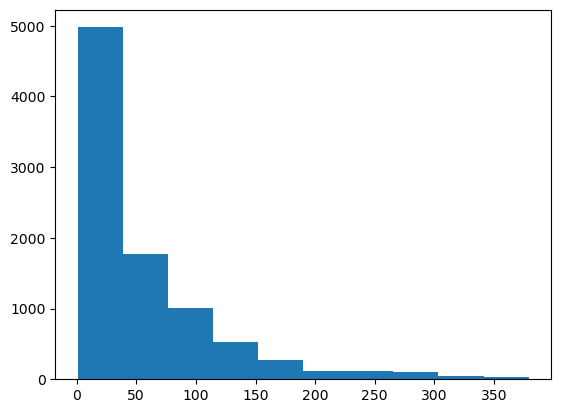

In [431]:
plt.hist(cnt_arr)

#### Trajecotry generation for lms with MCC

In [420]:
kern_size_arr = [0.1018]
step_size_arr = [0.0015]
k1,k2 = len(kern_size_arr),len(step_size_arr)

print(k1,k2)

mse_train_step = np.zeros((k1,k2))
mse_val_step = np.zeros((k1,k2))

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

for i in tqdm(range(k1)):
    
    kern_size = kern_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,_,w = algo_func.lms_mcc(ip_train,op_train,fil_order,step_size,kern_size)
        mse_train_step[i][j]=algo_func.mse(ip_train,op_train,w[-1])
        mse_val_step[i][j] = algo_func.mse(ip_val,op_val,w[-1])

1 1


100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 13.14it/s]


In [427]:
cnt_arr = []
for i in range(8,len(op_train)-500):

    init_pos = i
    y_trac,cnt = algo_func.lms_trac_gen(ip_train,op_train,w[-1],init_pos,ot_threshold)
    cnt_arr.append(cnt)

np.average(cnt_arr)

28.96351750316322

(array([6893., 1422.,  636.,  234.,   90.,   79.,   37.,   31.,   31.,
          31.]),
 array([  1. ,  31.8,  62.6,  93.4, 124.2, 155. , 185.8, 216.6, 247.4,
        278.2, 309. ]),
 <BarContainer object of 10 artists>)

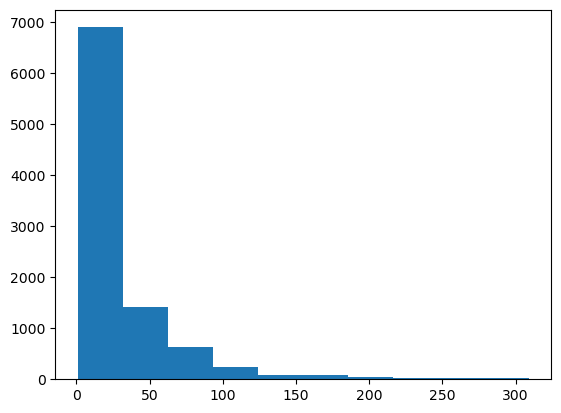

In [428]:
plt.hist(cnt_arr)

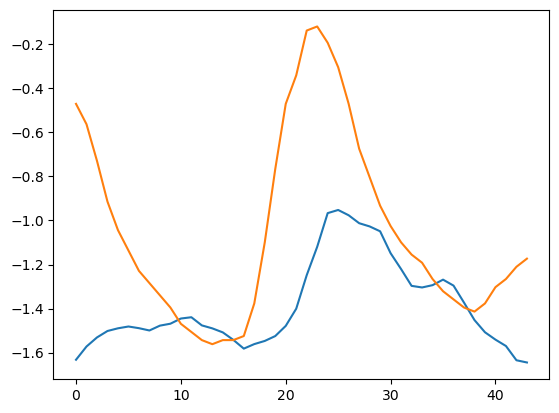

In [409]:
plt.plot(y_trac)
plt.plot(op_train[5000:5000+cnt])

In [484]:
ip_1 = ip_train[500:508]
ip_1.shape
ip_1 = ip_1[::-1]
ip_1 = ip_1[:,0].tolist()

In [485]:
np.sum(np.array(ip_1)*w[-1])

1.3810716762635145

In [470]:
w[-1].shape

(8,)

In [486]:
y_track = []

for i in range(50):
    
    ip_2 = np.array(ip_1[:8])
    y = np.sum(ip_2*w[-1])
    ip_1.insert(0,y)
    y_track.append(y)

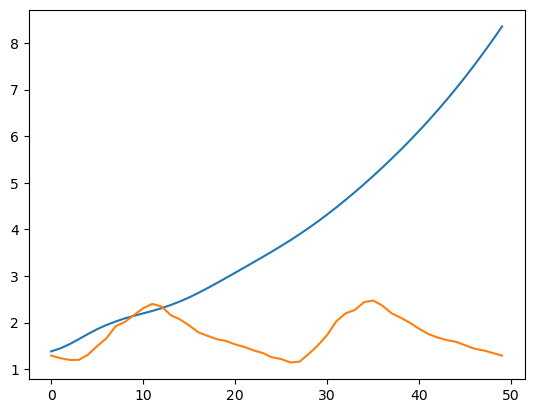

In [487]:
plt.plot(y_track)
plt.plot(op_train[500:550])

In [488]:
op_train[500] - y_track[0]

array([-0.08996117])